#                          CENG 489E – Data Mining

#                                Fall 2018-2019

#                                     Project_1

# 141180075 

# ŞEYDA KAYA


In [3]:
#KÜTÜPHANELERİ İMPORT ETME
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import itertools
from sklearn.metrics import accuracy_score 
from pandas.plotting import scatter_matrix
import seaborn as sns
from sklearn import metrics
from sklearn.naive_bayes import GaussianNB
from sklearn import preprocessing
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import classification_report, confusion_matrix 
from sklearn.discriminant_analysis import QuadraticDiscriminantAnalysis
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeRegressor
from sklearn.linear_model import LinearRegression
from sklearn.svm import SVC
import time

# VERİ SETLERİNİ YÜKLEME VE DATAFRAMELERE AYIRMA

In [4]:
#EĞİTİM SETİNİ YÜKLEME
TrainSet=pd.read_csv('datatraining.txt')

#STRING TO DATE, DATE TO İNT İŞLEMİ
TrainSet['date'] = pd.to_datetime(TrainSet['date'], format='%Y-%m-%d %H:%M:%S')
TrainSet['date'] = TrainSet['date'].astype('int64')
TrainSet.info()

#TRAIN SETİNİ DATAFRAMELERE AYIRMA
x_train=TrainSet.iloc[:,0:6].values
x_train=pd.DataFrame(data=x_train,index=range(8143),columns=['date','Temperature','Humidity','Light','CO2','HumidtyRatio'])
print(x_train)

y_train=TrainSet.iloc[:,-1].values
y_train=pd.DataFrame(data=y_train,index=range(8143),columns=['Occupancy'])
print(y_train)

#TEST1 SETİNİ YÜKLEME
TestSet=pd.read_csv('datatest.txt')

TestSet['date'] =pd.to_datetime(TestSet['date'])
TestSet['date'] = TestSet['date'].astype('int64')
TestSet.info()

#TEST1 SETİNİ DATAFRAMELERE AYIRMA
x_test=TestSet.iloc[:,0:6].values
x_test=pd.DataFrame(data=x_test,index=range(2665),columns=['date','Temperature','Humidity','Light','CO2','HumidtyRatio'])

y_test=TestSet.iloc[:,-1].values
y_test=pd.DataFrame(data=y_test,index=range(2665),columns=['Occupancy'])

#TEST2 SETİNİ YÜKLEME
TestSet_2=pd.read_csv('datatest2.txt')

TestSet_2['date'] =pd.to_datetime(TestSet_2['date'])
TestSet_2['date'] = TestSet_2['date'].astype('int64')
TestSet_2.info()

#TEST2 SETİNİ DATAFRAMELERE AYIRMA
x_test2=TestSet_2.iloc[:,0:6].values
x_test2=pd.DataFrame(data=x_test2,index=range(9752),columns=['date','Temperature','Humidity','Light','CO2','HumidtyRatio'])

y_test2=TestSet_2.iloc[:,-1].values
y_test2=pd.DataFrame(data=y_test2,index=range(9752),columns=['Occupancy'])


<class 'pandas.core.frame.DataFrame'>
Int64Index: 8143 entries, 1 to 8143
Data columns (total 7 columns):
date             8143 non-null int64
Temperature      8143 non-null float64
Humidity         8143 non-null float64
Light            8143 non-null float64
CO2              8143 non-null float64
HumidityRatio    8143 non-null float64
Occupancy        8143 non-null int64
dtypes: float64(5), int64(2)
memory usage: 508.9 KB
              date  Temperature   Humidity  Light         CO2  HumidtyRatio
0     1.423072e+18    23.180000  27.272000  426.0  721.250000      0.004793
1     1.423072e+18    23.150000  27.267500  429.5  714.000000      0.004783
2     1.423072e+18    23.150000  27.245000  426.0  713.500000      0.004779
3     1.423072e+18    23.150000  27.200000  426.0  708.250000      0.004772
4     1.423072e+18    23.100000  27.200000  426.0  704.500000      0.004757
5     1.423073e+18    23.100000  27.200000  419.0  701.000000      0.004757
6     1.423073e+18    23.100000  27.20000

# ÖLÇEKLENDİRME

In [5]:
#SCALE ETME
from sklearn.preprocessing import StandardScaler
scaler=StandardScaler()
X_train=scaler.fit_transform(x_train)
print("ÖLÇEKLENMİŞ EĞİTİM SETİM")
print(X_train,"\n")

X_test=scaler.fit_transform(x_test)
print("ÖLÇEKLENMİŞ TEST SETİM")
print(X_test,"\n")

X_test2=scaler.fit_transform(x_test2)
print("ÖLÇEKLENMİŞ TEST_2 SETİM")
print(X_test2)

ÖLÇEKLENMİŞ EĞİTİM SETİM
[[-1.73183591  2.51847007  0.27852622  1.57376283  0.36494808  1.09175697]
 [-1.73141759  2.48896731  0.27771261  1.59173515  0.34188106  1.08055497]
 [-1.73098509  2.48896731  0.27364453  1.57376283  0.34029023  1.07588816]
 ...
 [ 1.73098242  0.47294534  1.87375407  1.60970748  0.61073113  2.03352707]
 [ 1.73141491  0.47294534  1.90358662  1.60970748  0.68019732  2.063811  ]
 [ 1.73184032  0.47294534  1.89273842  1.68159679  0.68231843  2.05279837]] 

ÖLÇEKLENMİŞ TEST SETİM
[[-1.73139426  2.20476235  0.37681367  1.56686218  0.10694007  1.20754022]
 [-1.73011607  2.22227495  0.38420166  1.53968001  0.14521407  1.22146086]
 [-1.72879456  2.23395002  0.35957501  1.51676171  0.17688126  1.20916118]
 ...
 [ 1.72878639  2.81770341  0.14203962  2.4934545   1.39390353  1.33301272]
 [ 1.73008624  2.84364801  0.14203962  2.47746498  1.38433502  1.34579091]
 [ 1.73140775  2.89391566  0.13451481  2.41750431  1.38775235  1.36487235]] 

ÖLÇEKLENMİŞ TEST_2 SETİM
[[-1.731871

# VERİ GÖRSELLEŞTİRME 

EĞİTİM SETİMDEKİ FEATURELERİN GÖRSELLEŞTİRİLMESİ


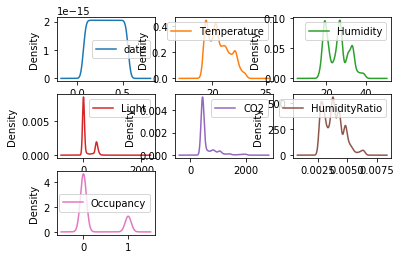

In [6]:
#VERİ GÖRSELLEŞTİRME
#Density Plots
"""Density Plots, her bir özelliğin dağıtımı hakkında hızlı bir fikir edinmenin başka bir yoludur."""
TrainSet.plot(kind='density', subplots=True, layout=(3,3), sharex=False)

print("EĞİTİM SETİMDEKİ FEATURELERİN GÖRSELLEŞTİRİLMESİ")
plt.show()

Correlation Matrix


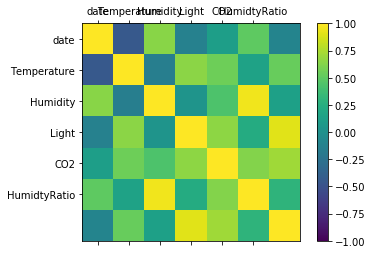

In [7]:
#VERİ GÖRSELLEŞTİRME
#Correlation Matrix Plot
"""Matrisin simetrik olduğunu, yani matrisin sol altının sağ üst ile aynı olduğunu görebiliriz.
Bu, aynı veriler üzerinde iki farklı görüntünün tek bir grafikte görebildiğimiz için kullanışlıdır.
Ayrıca her bir değişkenin birbiriyle beklediğimiz gibi 
sol üst sağdan sağa doğru diyagonal çizgi ile mükemmel bir şekilde pozitif olduğunu görebiliyoruz."""


correlations = TrainSet.corr()
fig = plt.figure()
ax = fig.add_subplot(111)
cax = ax.matshow(correlations, vmin=-1, vmax=1)
fig.colorbar(cax)
ticks = np.arange(0,6,1)
ax.set_xticks(ticks)
ax.set_yticks(ticks)
ax.set_xticklabels(x_train)
ax.set_yticklabels(x_train)

print("Correlation Matrix")
plt.show()


# confusıon matriss:
Bir karışıklık matrisi, gerçek değerlerin bilinmekte olduğu bir dizi test verisi üzerinde bir sınıflandırma modelinin performansını tanımlamak için sıklıkla kullanılan bir tablodur.

In [8]:
#CONFUSION MATRIS İLE GÖRSELLEŞTİRME

def confusionMatriss(cm,classes = ['0.0','1.0'],normalize=True,title='Confusion Matris',cmap = plt.cm.Blues):
    
    if normalize:
        cm = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis]
        
    plt.imshow(cm,interpolation='nearest',cmap= cmap)
    plt.title(title)
    plt.colorbar()
    tickM = np.arange(len(classes))
    plt.xticks(tickM,classes, rotation =45 )
    plt.yticks(tickM,classes)
    fmt = '.2f'
    thresh = cm.max() / 2.
    for i, j in itertools.product(range(cm.shape[0]), range(cm.shape[1])):
        plt.text(j, i, format(cm[i, j], fmt),
                 horizontalalignment="center",
                 color="white" if cm[i, j] > thresh else "black")

    plt.ylabel('True label')
    plt.xlabel('Predicted label')
    

# yeni feature ekleme

In [9]:
# YENİ FEATURE EKLEME

x_train_new=x_train
x_train_new.columns=x_train.columns
x_train_new['HumTemp']=x_train.Humidity/x_train.Temperature
print(x_train_new)

x_test_new=x_test
x_test_new.columns=x_test.columns
x_test_new['HumTemp']=x_test.Humidity/x_test.Temperature
print(x_test_new)

x_test2_new=x_test2
x_test2_new.columns=x_test2.columns
x_test2_new['HumTemp']=x_test2.Humidity/x_test2.Temperature
print(x_test2_new)

              date  Temperature   Humidity  Light         CO2  HumidtyRatio  \
0     1.423072e+18    23.180000  27.272000  426.0  721.250000      0.004793   
1     1.423072e+18    23.150000  27.267500  429.5  714.000000      0.004783   
2     1.423072e+18    23.150000  27.245000  426.0  713.500000      0.004779   
3     1.423072e+18    23.150000  27.200000  426.0  708.250000      0.004772   
4     1.423072e+18    23.100000  27.200000  426.0  704.500000      0.004757   
5     1.423073e+18    23.100000  27.200000  419.0  701.000000      0.004757   
6     1.423073e+18    23.100000  27.200000  419.0  701.666667      0.004757   
7     1.423073e+18    23.100000  27.200000  419.0  699.000000      0.004757   
8     1.423073e+18    23.100000  27.200000  419.0  689.333333      0.004757   
9     1.423073e+18    23.075000  27.175000  419.0  688.000000      0.004745   
10    1.423073e+18    23.075000  27.150000  419.0  690.250000      0.004741   
11    1.423073e+18    23.100000  27.100000  419.0  6

In [11]:
#YENİ FEATURE EKLEDİKTEN SONRA SCALE ETME

from sklearn.preprocessing import StandardScaler
scaler=StandardScaler()
X_train_new=scaler.fit_transform(x_train_new)
print("ÖLÇEKLENMİŞ YENİ_EĞİTİM SETİM")
print(X_train_new,"\n")
X_test_new=scaler.fit_transform(x_test_new)
print("ÖLÇEKLENMİŞ YENİ_TEST SETİM")
print(X_test_new,"\n")
X_test2_new=scaler.fit_transform(x_test2_new)
print("ÖLÇEKLENMİŞ YENİ_TEST2 SETİM")
print(X_test2_new)

ÖLÇEKLENMİŞ YENİ_EĞİTİM SETİM
[[-1.73183591  2.51847007  0.27852622 ...  0.36494808  1.09175697
  -0.27073872]
 [-1.73141759  2.48896731  0.27771261 ...  0.34188106  1.08055497
  -0.2660186 ]
 [-1.73098509  2.48896731  0.27364453 ...  0.34029023  1.07588816
  -0.2694672 ]
 ...
 [ 1.73098242  0.47294534  1.87375407 ...  0.61073113  2.03352707
   1.62448245]
 [ 1.73141491  0.47294534  1.90358662 ...  0.68019732  2.063811
   1.65222924]
 [ 1.73184032  0.47294534  1.89273842 ...  0.68231843  2.05279837
   1.6421395 ]] 

ÖLÇEKLENMİŞ YENİ_TEST SETİM
[[-1.73139426  2.20476235  0.37681367 ...  0.10694007  1.20754022
  -0.89815048]
 [-1.73011607  2.22227495  0.38420166 ...  0.14521407  1.22146086
  -0.89916168]
 [-1.72879456  2.23395002  0.35957501 ...  0.17688126  1.20916118
  -0.9370876 ]
 ...
 [ 1.72878639  2.81770341  0.14203962 ...  1.39390353  1.33301272
  -1.53922752]
 [ 1.73008624  2.84364801  0.14203962 ...  1.38433502  1.34579091
  -1.55342673]
 [ 1.73140775  2.89391566  0.13451481 ..

# 1. KNN ALGORİTMASI

# K=3 iken

C:\ProgramData\Anaconda3\lib\site-packages\ipykernel_launcher.py:3: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  This is separate from the ipykernel package so we can avoid doing imports until


K=3 İKEN
orjinal TRAIN setimin accuary_score=  0.9995087805477096
ORJINAL TEST_1 setimin accuary_score= 0.3647279549718574
ORJINAL TEST_2 setimin accuary_score= 0.21011074651353567 

------------------------------------------------------------------------------------------
[[   0 1693]
 [   0  972]]
             precision    recall  f1-score   support

          0       0.00      0.00      0.00      1693
          1       0.36      1.00      0.53       972

avg / total       0.13      0.36      0.19      2665

------------------------------------------------------------------------------------------
[[   0 7703]
 [   0 2049]]
             precision    recall  f1-score   support

          0       0.00      0.00      0.00      7703
          1       0.21      1.00      0.35      2049

avg / total       0.04      0.21      0.07      9752



C:\ProgramData\Anaconda3\lib\site-packages\sklearn\metrics\classification.py:1135: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\metrics\classification.py:1135: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)


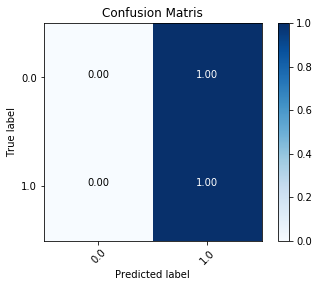

In [12]:
#KNN ALGORİTHM-(ORJINAL VERİ ÜZERİNDE ETKİSİ K=3)
kNN = KNeighborsClassifier(n_neighbors=3)
kNN.fit(x_train,y_train)
print("K=3 İKEN")
print("orjinal TRAIN setimin accuary_score= ",kNN.score(x_train,y_train))
y_pred = kNN.predict(x_test)
print("ORJINAL TEST_1 setimin accuary_score=",accuracy_score(y_test, y_pred))
y_pred2 = kNN.predict(x_test2)
print("ORJINAL TEST_2 setimin accuary_score=",accuracy_score(y_test2,y_pred2),"\n")

print("------------------------------------------------------------------------------------------")
print(confusion_matrix(y_test, y_pred))  
print(classification_report(y_test, y_pred))   
print("------------------------------------------------------------------------------------------")
print(confusion_matrix(y_test2, y_pred2))  
print(classification_report(y_test2, y_pred2))  
knt=confusion_matrix(y_test2,y_pred2)
confusionMatriss(knt,['0.0','1.0'])

C:\ProgramData\Anaconda3\lib\site-packages\ipykernel_launcher.py:3: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  This is separate from the ipykernel package so we can avoid doing imports until


K=3 İKEN
SCALE EDİLMİŞ TRAIN setimin accuary_score=  0.9969298784231856
SCALE EDİLMİŞ TEST_1 setimin accuary_score= 0.9553470919324578
SCALE EDİLMİŞ TEST_2 setimin accuary_score= 0.9764150943396226
------------------------------------------------------------------------------------------
[[1642   51]
 [  68  904]]
             precision    recall  f1-score   support

          0       0.96      0.97      0.97      1693
          1       0.95      0.93      0.94       972

avg / total       0.96      0.96      0.96      2665

------------------------------------------------------------------------------------------
[[7669   34]
 [ 196 1853]]
             precision    recall  f1-score   support

          0       0.98      1.00      0.99      7703
          1       0.98      0.90      0.94      2049

avg / total       0.98      0.98      0.98      9752



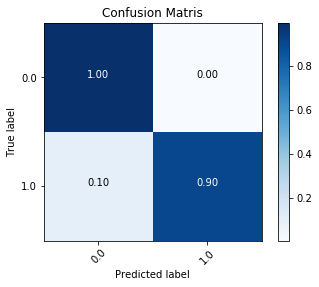

In [13]:
#KNN ALGORITHM-(SCALE EDİLMİŞ VERİ ÜZERİNDE ETKİSİ K=3)
kNN = KNeighborsClassifier(n_neighbors=3)
kNN.fit(X_train,y_train)
print("K=3 İKEN")
print("SCALE EDİLMİŞ TRAIN setimin accuary_score= ",kNN.score(X_train,y_train))
y_pred = kNN.predict(X_test)
print("SCALE EDİLMİŞ TEST_1 setimin accuary_score=",accuracy_score(y_test, y_pred))
y_pred2 = kNN.predict(X_test2)
print("SCALE EDİLMİŞ TEST_2 setimin accuary_score=",accuracy_score(y_test2,y_pred2))
print("------------------------------------------------------------------------------------------")
print(confusion_matrix(y_test, y_pred))  
print(classification_report(y_test, y_pred))   
print("------------------------------------------------------------------------------------------")
print(confusion_matrix(y_test2, y_pred2))  
print(classification_report(y_test2, y_pred2))  
knr=confusion_matrix(y_test2,y_pred2)
confusionMatriss(knr,['0.0','1.0'])

C:\ProgramData\Anaconda3\lib\site-packages\ipykernel_launcher.py:4: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  after removing the cwd from sys.path.


K=3 İKEN
YENİ FEATURE EKLENMİŞ TRAIN setimin accuary_score=  0.9995087805477096
YENİ FEATURE EKLENMİŞ TEST_1 setimin accuary_score=  0.3647279549718574
YENİ FEATURE EKLENMİŞ TEST_2 setimin accuary_score=  0.21011074651353567
------------------------------------------------------------------------------------------
[[   0 1693]
 [   0  972]]
             precision    recall  f1-score   support

          0       0.00      0.00      0.00      1693
          1       0.36      1.00      0.53       972

avg / total       0.13      0.36      0.19      2665

------------------------------------------------------------------------------------------
[[   0 7703]
 [   0 2049]]
             precision    recall  f1-score   support

          0       0.00      0.00      0.00      7703
          1       0.21      1.00      0.35      2049

avg / total       0.04      0.21      0.07      9752



C:\ProgramData\Anaconda3\lib\site-packages\sklearn\metrics\classification.py:1135: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\metrics\classification.py:1135: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)


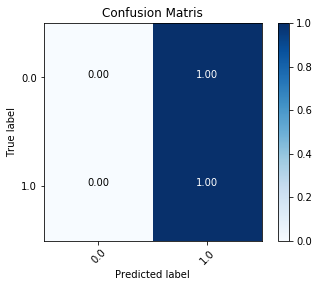

In [14]:
#KNN ALGORITHM-(YENİ FEATURE EKLENMİŞ HALİNE ETKİSİ K=3)

kNN = KNeighborsClassifier(n_neighbors=3)
kNN.fit(x_train_new,y_train)
print("K=3 İKEN")
print("YENİ FEATURE EKLENMİŞ TRAIN setimin accuary_score= ",kNN.score(x_train_new,y_train))
y_pred = kNN.predict(x_test_new)
print("YENİ FEATURE EKLENMİŞ TEST_1 setimin accuary_score= ",accuracy_score(y_test, y_pred))
y_pred2 = kNN.predict(x_test2_new)
print("YENİ FEATURE EKLENMİŞ TEST_2 setimin accuary_score= ",accuracy_score(y_test2,y_pred2))
print("------------------------------------------------------------------------------------------")
print(confusion_matrix(y_test, y_pred))  
print(classification_report(y_test, y_pred))   
print("------------------------------------------------------------------------------------------")
print(confusion_matrix(y_test2, y_pred2))  
print(classification_report(y_test2, y_pred2)) 
knm=confusion_matrix(y_test2,y_pred2)
confusionMatriss(knm,['0.0','1.0'])

C:\ProgramData\Anaconda3\lib\site-packages\ipykernel_launcher.py:3: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  This is separate from the ipykernel package so we can avoid doing imports until


K=3 İKEN
YENİ FEATURE EKLENMİŞ VE SCALE EDİLMİŞ TRAIN setimin accuary_score=  0.9969298784231856
YENİ FEATURE EKLENMİŞ VE SCALE EDİLMİŞ TEST_1 setimin accuary_score=  0.9193245778611632
YENİ FEATURE EKLENMİŞ VE SCALE EDİLMİŞ TEST_1 setimin accuary_score=  0.9711853978671042
------------------------------------------------------------------------------------------
[[1643   50]
 [ 165  807]]
             precision    recall  f1-score   support

          0       0.91      0.97      0.94      1693
          1       0.94      0.83      0.88       972

avg / total       0.92      0.92      0.92      2665

------------------------------------------------------------------------------------------
[[7652   51]
 [ 230 1819]]
             precision    recall  f1-score   support

          0       0.97      0.99      0.98      7703
          1       0.97      0.89      0.93      2049

avg / total       0.97      0.97      0.97      9752



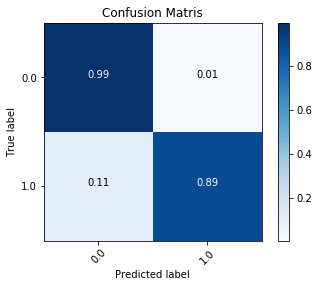

In [15]:
#KNN ALGORITHM-(YENİ FEATURE EKLENMİŞ ve SCALE EDİLMİŞ VERİ ÜZERİNDE ETKİSİ K=3)
kNN = KNeighborsClassifier(n_neighbors=3)
kNN.fit(X_train_new,y_train)
print("K=3 İKEN")
print("YENİ FEATURE EKLENMİŞ VE SCALE EDİLMİŞ TRAIN setimin accuary_score= ",kNN.score(X_train_new,y_train))
y_pred = kNN.predict(X_test_new)
print("YENİ FEATURE EKLENMİŞ VE SCALE EDİLMİŞ TEST_1 setimin accuary_score= ",accuracy_score(y_test, y_pred))
y_pred2 = kNN.predict(X_test2_new)
print("YENİ FEATURE EKLENMİŞ VE SCALE EDİLMİŞ TEST_1 setimin accuary_score= ",accuracy_score(y_test2,y_pred2))
print("------------------------------------------------------------------------------------------")
print(confusion_matrix(y_test, y_pred))  
print(classification_report(y_test, y_pred))   
print("------------------------------------------------------------------------------------------")
print(confusion_matrix(y_test2, y_pred2))  
print(classification_report(y_test2, y_pred2))  
knn=confusion_matrix(y_test2,y_pred2)
confusionMatriss(knn,['0.0','1.0'])

# K=5 iken

C:\ProgramData\Anaconda3\lib\site-packages\ipykernel_launcher.py:4: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  after removing the cwd from sys.path.


K=5 İKEN
orjinal TRAIN setimin accuary_score=  0.9984035367800564
orjinal TEST_1 setimin accuary_score= 0.3647279549718574
orjinal TEST_2 setimin accuary_score= 0.21011074651353567
------------------------------------------------------------------------------------------
[[   0 1693]
 [   0  972]]
             precision    recall  f1-score   support

          0       0.00      0.00      0.00      1693
          1       0.36      1.00      0.53       972

avg / total       0.13      0.36      0.19      2665

------------------------------------------------------------------------------------------
[[   0 7703]
 [   0 2049]]
             precision    recall  f1-score   support

          0       0.00      0.00      0.00      7703
          1       0.21      1.00      0.35      2049

avg / total       0.04      0.21      0.07      9752



C:\ProgramData\Anaconda3\lib\site-packages\sklearn\metrics\classification.py:1135: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\metrics\classification.py:1135: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)


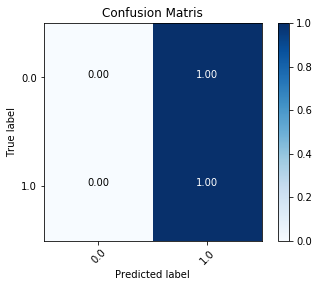

In [16]:
#KNN ALGORİTHM-(ORJINAL VERİ ÜZERİNDE ETKİSİ K=5)

kNN = KNeighborsClassifier(n_neighbors=5)
kNN.fit(x_train,y_train)
print("K=5 İKEN")
print("orjinal TRAIN setimin accuary_score= ",kNN.score(x_train,y_train))
y_pred = kNN.predict(x_test)
print("orjinal TEST_1 setimin accuary_score=",accuracy_score(y_test, y_pred))
y_pred2 = kNN.predict(x_test2)
print("orjinal TEST_2 setimin accuary_score=",accuracy_score(y_test2,y_pred2))
print("------------------------------------------------------------------------------------------")
print(confusion_matrix(y_test, y_pred))  
print(classification_report(y_test, y_pred))   
print("------------------------------------------------------------------------------------------")
print(confusion_matrix(y_test2, y_pred2))  
print(classification_report(y_test2, y_pred2))
conm=confusion_matrix(y_test2,y_pred2)
confusionMatriss(conm,['0.0','1.0'])

C:\ProgramData\Anaconda3\lib\site-packages\ipykernel_launcher.py:4: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  after removing the cwd from sys.path.


K=5 İKEN
SCALE EDİLMİŞ TRAIN setimin accuary_score=  0.995947439518605
SCALE EDİLMİŞ TEST_1 setimin accuary_score= 0.9545966228893058
SCALE EDİLMİŞ TEST_2 setimin accuary_score= 0.975287120590648
------------------------------------------------------------------------------------------
[[1648   45]
 [  76  896]]
             precision    recall  f1-score   support

          0       0.96      0.97      0.96      1693
          1       0.95      0.92      0.94       972

avg / total       0.95      0.95      0.95      2665

------------------------------------------------------------------------------------------
[[7664   39]
 [ 202 1847]]
             precision    recall  f1-score   support

          0       0.97      0.99      0.98      7703
          1       0.98      0.90      0.94      2049

avg / total       0.98      0.98      0.97      9752



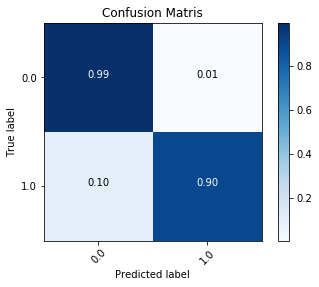

In [17]:
#KNN ALGORITHM-(SCALE EDİLMİŞ VERİ ÜZERİNDE ETKİSİ K=5)

kNN = KNeighborsClassifier(n_neighbors=5)
kNN.fit(X_train,y_train)
print("K=5 İKEN")
print("SCALE EDİLMİŞ TRAIN setimin accuary_score= ",kNN.score(X_train,y_train))
y_pred = kNN.predict(X_test)
print("SCALE EDİLMİŞ TEST_1 setimin accuary_score=",accuracy_score(y_test, y_pred))
y_pred2 = kNN.predict(X_test2)
print("SCALE EDİLMİŞ TEST_2 setimin accuary_score=",accuracy_score(y_test2,y_pred2))
print("------------------------------------------------------------------------------------------")
print(confusion_matrix(y_test, y_pred))  
print(classification_report(y_test, y_pred))   
print("------------------------------------------------------------------------------------------")
print(confusion_matrix(y_test2, y_pred2))  
print(classification_report(y_test2, y_pred2))  
con = confusion_matrix(y_test2,y_pred2)
confusionMatriss(con,['0.0','1.0'])

C:\ProgramData\Anaconda3\lib\site-packages\ipykernel_launcher.py:4: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  after removing the cwd from sys.path.


K=5 İKEN
YENİ FEATURE EKLENMİŞ TRAIN setimin accuary_score=  0.9984035367800564
YENİ FEATURE EKLENMİŞ TEST_1 setimin accuary_score= 0.3647279549718574
YENİ FEATURE EKLENMİŞ TEST_2 setimin accuary_score= 0.21011074651353567
------------------------------------------------------------------------------------------
[[   0 1693]
 [   0  972]]
             precision    recall  f1-score   support

          0       0.00      0.00      0.00      1693
          1       0.36      1.00      0.53       972

avg / total       0.13      0.36      0.19      2665

------------------------------------------------------------------------------------------
[[   0 7703]
 [   0 2049]]
             precision    recall  f1-score   support

          0       0.00      0.00      0.00      7703
          1       0.21      1.00      0.35      2049

avg / total       0.04      0.21      0.07      9752



C:\ProgramData\Anaconda3\lib\site-packages\sklearn\metrics\classification.py:1135: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\metrics\classification.py:1135: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)


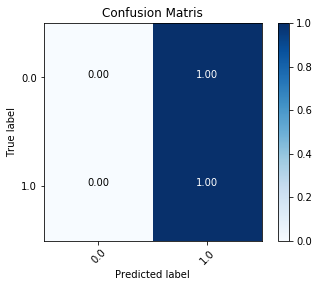

In [18]:
#KNN ALGORITHM-(YENİ FEATURE EKLENMİŞ HALİNE ETKİSİ K=5)

kNN = KNeighborsClassifier(n_neighbors=5)
kNN.fit(x_train_new,y_train)
print("K=5 İKEN")
print("YENİ FEATURE EKLENMİŞ TRAIN setimin accuary_score= ",kNN.score(x_train_new,y_train))
y_pred = kNN.predict(x_test_new)
print("YENİ FEATURE EKLENMİŞ TEST_1 setimin accuary_score=",accuracy_score(y_test, y_pred))
y_pred2 = kNN.predict(x_test2_new)
print("YENİ FEATURE EKLENMİŞ TEST_2 setimin accuary_score=",accuracy_score(y_test2,y_pred2))
print("------------------------------------------------------------------------------------------")
print(confusion_matrix(y_test, y_pred))  
print(classification_report(y_test, y_pred))   
print("------------------------------------------------------------------------------------------")
print(confusion_matrix(y_test2, y_pred2))  
print(classification_report(y_test2, y_pred2))  

conf=confusion_matrix(y_test2,y_pred2)
confusionMatriss(conf,['0.0','1.0'])

C:\ProgramData\Anaconda3\lib\site-packages\ipykernel_launcher.py:3: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  This is separate from the ipykernel package so we can avoid doing imports until


K=3 İKEN
YENİ FEATURE EKLENMİŞ VE SCALE EDİLMİŞ TRAIN setimin accuary_score=  0.9960702443816775
YENİ FEATURE EKLENMİŞ VE SCALE EDİLMİŞ TEST_1 setimin accuary_score= 0.9189493433395872
YENİ FEATURE EKLENMİŞ VE SCALE EDİLMİŞ TEST_2 setimin accuary_score= 0.9700574241181296
------------------------------------------------------------------------------------------
[[1645   48]
 [ 168  804]]
             precision    recall  f1-score   support

          0       0.91      0.97      0.94      1693
          1       0.94      0.83      0.88       972

avg / total       0.92      0.92      0.92      2665

------------------------------------------------------------------------------------------
[[7646   57]
 [ 235 1814]]
             precision    recall  f1-score   support

          0       0.97      0.99      0.98      7703
          1       0.97      0.89      0.93      2049

avg / total       0.97      0.97      0.97      9752



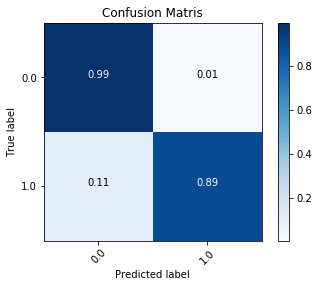

In [26]:
#KNN ALGORITHM-(YENİ FEATURE EKLENMİŞ ve SCALE EDİLMİŞ VERİ ÜZERİNDE ETKİSİ K=5)
kNN = KNeighborsClassifier(n_neighbors=5)
kNN.fit(X_train_new,y_train)
print("K=5 İKEN")
print("YENİ FEATURE EKLENMİŞ VE SCALE EDİLMİŞ TRAIN setimin accuary_score= ",kNN.score(X_train_new,y_train))
y_pred = kNN.predict(X_test_new)
print("YENİ FEATURE EKLENMİŞ VE SCALE EDİLMİŞ TEST_1 setimin accuary_score=",accuracy_score(y_test, y_pred))
y_pred2 = kNN.predict(X_test2_new)
print("YENİ FEATURE EKLENMİŞ VE SCALE EDİLMİŞ TEST_2 setimin accuary_score=",accuracy_score(y_test2,y_pred2))
print("------------------------------------------------------------------------------------------")
print(confusion_matrix(y_test, y_pred))  
print(classification_report(y_test, y_pred))   
print("------------------------------------------------------------------------------------------")
print(confusion_matrix(y_test2, y_pred2))  
print(classification_report(y_test2, y_pred2)) 
confu=confusion_matrix(y_test2,y_pred2)
confusionMatriss(confu,['0.0','1.0'])

# K=101 iken

C:\ProgramData\Anaconda3\lib\site-packages\ipykernel_launcher.py:4: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  after removing the cwd from sys.path.


K=101 İKEN
orjinal TRAIN setimin accuary_score=  0.9852634164312907
orjinal TEST_1 setimin accuary_score= 0.6352720450281426
orjinal TEST_2 setimin accuary_score= 0.21011074651353567
------------------------------------------------------------------------------------------
[[1693    0]
 [ 972    0]]
             precision    recall  f1-score   support

          0       0.64      1.00      0.78      1693
          1       0.00      0.00      0.00       972

avg / total       0.40      0.64      0.49      2665

------------------------------------------------------------------------------------------
[[   0 7703]
 [   0 2049]]
             precision    recall  f1-score   support

          0       0.00      0.00      0.00      7703
          1       0.21      1.00      0.35      2049

avg / total       0.04      0.21      0.07      9752



C:\ProgramData\Anaconda3\lib\site-packages\sklearn\metrics\classification.py:1135: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\metrics\classification.py:1135: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)


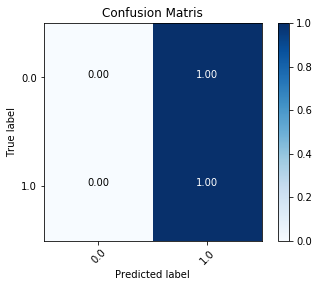

In [19]:
#KNN ALGORİTHM-(ORJINAL VERİ ÜZERİNDE ETKİSİ K=101)

kNN = KNeighborsClassifier(n_neighbors=101)
kNN.fit(x_train,y_train)
print("K=101 İKEN")
print("orjinal TRAIN setimin accuary_score= ",kNN.score(x_train,y_train))
y_pred = kNN.predict(x_test)
print("orjinal TEST_1 setimin accuary_score=",accuracy_score(y_test, y_pred))
y_pred2 = kNN.predict(x_test2)
print("orjinal TEST_2 setimin accuary_score=",accuracy_score(y_test2,y_pred2))
print("------------------------------------------------------------------------------------------")
print(confusion_matrix(y_test, y_pred))  
print(classification_report(y_test, y_pred))   
print("------------------------------------------------------------------------------------------")
print(confusion_matrix(y_test2, y_pred2))  
print(classification_report(y_test2, y_pred2))  
cor=confusion_matrix(y_test2,y_pred2)
confusionMatriss(cor,['0.0','1.0'])

C:\ProgramData\Anaconda3\lib\site-packages\ipykernel_launcher.py:4: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  after removing the cwd from sys.path.


K=7 İKEN
SCALE EDİLMİŞ TRAIN setimin accuary_score=  0.9872282942404519
SCALE EDİLMİŞ TEST_1 setimin accuary_score= 0.9362101313320825
SCALE EDİLMİŞ TEST_2 setimin accuary_score= 0.9914889253486464
------------------------------------------------------------------------------------------
[[1655   38]
 [ 132  840]]
             precision    recall  f1-score   support

          0       0.93      0.98      0.95      1693
          1       0.96      0.86      0.91       972

avg / total       0.94      0.94      0.94      2665

------------------------------------------------------------------------------------------
[[7656   47]
 [  36 2013]]
             precision    recall  f1-score   support

          0       1.00      0.99      0.99      7703
          1       0.98      0.98      0.98      2049

avg / total       0.99      0.99      0.99      9752



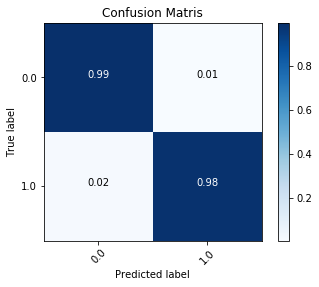

In [33]:
#KNN ALGORITHM-(SCALE EDİLMİŞ VERİ ÜZERİNDE ETKİSİ K=101)

kNN = KNeighborsClassifier(n_neighbors=101)
kNN.fit(X_train,y_train)
print("K=101 İKEN")
print("SCALE EDİLMİŞ TRAIN setimin accuary_score= ",kNN.score(X_train,y_train))
y_pred = kNN.predict(X_test)
print("SCALE EDİLMİŞ TEST_1 setimin accuary_score=",accuracy_score(y_test, y_pred))
y_pred2 = kNN.predict(X_test2)
print("SCALE EDİLMİŞ TEST_2 setimin accuary_score=",accuracy_score(y_test2,y_pred2))
print("------------------------------------------------------------------------------------------")
print(confusion_matrix(y_test, y_pred))  
print(classification_report(y_test, y_pred))   
print("------------------------------------------------------------------------------------------")
print(confusion_matrix(y_test2, y_pred2))  
print(classification_report(y_test2, y_pred2))  
co=confusion_matrix(y_test2,y_pred2)
confusionMatriss(co,['0.0','1.0'])

C:\ProgramData\Anaconda3\lib\site-packages\ipykernel_launcher.py:4: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  after removing the cwd from sys.path.


K=101 İKEN
YENİ FEATURE EKLENMİŞ TRAIN setimin accuary_score=  0.9852634164312907
YENİ FEATURE EKLENMİŞ TEST_1 setimin accuary_score= 0.6352720450281426
YENİ FEATURE EKLENMİŞ TEST_2 setimin accuary_score= 0.21011074651353567
------------------------------------------------------------------------------------------
[[1693    0]
 [ 972    0]]
             precision    recall  f1-score   support

          0       0.64      1.00      0.78      1693
          1       0.00      0.00      0.00       972

avg / total       0.40      0.64      0.49      2665

------------------------------------------------------------------------------------------
[[   0 7703]
 [   0 2049]]
             precision    recall  f1-score   support

          0       0.00      0.00      0.00      7703
          1       0.21      1.00      0.35      2049

avg / total       0.04      0.21      0.07      9752



C:\ProgramData\Anaconda3\lib\site-packages\sklearn\metrics\classification.py:1135: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\metrics\classification.py:1135: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)


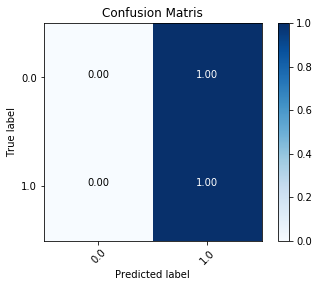

In [20]:
#KNN ALGORITHM-(YENİ FEATURE EKLENMİŞ HALİNE ETKİSİ K=101)

kNN = KNeighborsClassifier(n_neighbors=101)
kNN.fit(x_train_new,y_train)
print("K=101 İKEN")

print("YENİ FEATURE EKLENMİŞ TRAIN setimin accuary_score= ",kNN.score(x_train_new,y_train))
y_pred = kNN.predict(x_test_new)
print("YENİ FEATURE EKLENMİŞ TEST_1 setimin accuary_score=",accuracy_score(y_test, y_pred))
y_pred2 = kNN.predict(x_test2_new)
print("YENİ FEATURE EKLENMİŞ TEST_2 setimin accuary_score=",accuracy_score(y_test2,y_pred2))
print("------------------------------------------------------------------------------------------")
print(confusion_matrix(y_test, y_pred))  
print(classification_report(y_test, y_pred))   
print("------------------------------------------------------------------------------------------")
print(confusion_matrix(y_test2, y_pred2))  
print(classification_report(y_test2, y_pred2))  
cm=confusion_matrix(y_test2,y_pred2)
confusionMatriss(cm,['0.0','1.0'])

C:\ProgramData\Anaconda3\lib\site-packages\ipykernel_launcher.py:3: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  This is separate from the ipykernel package so we can avoid doing imports until


K=7 İKEN
YENİ FEATURE EKLENMİŞ VE SCALE EDİLMİŞ TRAIN setimin accuary_score=  0.9920176839002824
YENİ FEATURE EKLENMİŞ VE SCALE EDİLMİŞ TEST_1 setimin accuary_score= 0.926078799249531
YENİ FEATURE EKLENMİŞ VE SCALE EDİLMİŞ TEST_2 setimin accuary_score= 0.9710828547990156
------------------------------------------------------------------------------------------
[[1643   50]
 [ 147  825]]
             precision    recall  f1-score   support

          0       0.92      0.97      0.94      1693
          1       0.94      0.85      0.89       972

avg / total       0.93      0.93      0.93      2665

------------------------------------------------------------------------------------------
[[7629   74]
 [ 208 1841]]
             precision    recall  f1-score   support

          0       0.97      0.99      0.98      7703
          1       0.96      0.90      0.93      2049

avg / total       0.97      0.97      0.97      9752



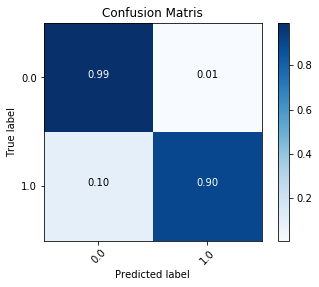

In [30]:
#KNN ALGORITHM-(YENİ FEATURE EKLENMİŞ ve SCALE EDİLMİŞ VERİ ÜZERİNDE ETKİSİ K=101)
kNN = KNeighborsClassifier(n_neighbors=101)
kNN.fit(X_train_new,y_train)
print("K=101 İKEN")
print("YENİ FEATURE EKLENMİŞ VE SCALE EDİLMİŞ TRAIN setimin accuary_score= ",kNN.score(X_train_new,y_train))
y_pred = kNN.predict(X_test_new)
print("YENİ FEATURE EKLENMİŞ VE SCALE EDİLMİŞ TEST_1 setimin accuary_score=",accuracy_score(y_test, y_pred))
y_pred2 = kNN.predict(X_test2_new)
print("YENİ FEATURE EKLENMİŞ VE SCALE EDİLMİŞ TEST_2 setimin accuary_score=",accuracy_score(y_test2,y_pred2))
print("------------------------------------------------------------------------------------------")
print(confusion_matrix(y_test, y_pred))  
print(classification_report(y_test, y_pred))   
print("------------------------------------------------------------------------------------------")
print(confusion_matrix(y_test2, y_pred2))  
print(classification_report(y_test2, y_pred2))  
cn=confusion_matrix(y_test2,y_pred2)
confusionMatriss(cn,['0.0','1.0'])

# 2.NAIVE BAYES ALGORİTMASI


C:\ProgramData\Anaconda3\lib\site-packages\sklearn\utils\validation.py:578: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


orjinal TRAIN setimin accuary_score=  0.7876703917475132
orjinal TEST_1 setimin accuary_score= 0.5924953095684803
orjinal TEST_2 setimin accuary_score= 0.6036710418375718
------------------------------------------------------------------------------------------
[[1376  317]
 [ 769  203]]
             precision    recall  f1-score   support

          0       0.64      0.81      0.72      1693
          1       0.39      0.21      0.27       972

avg / total       0.55      0.59      0.55      2665

------------------------------------------------------------------------------------------
[[4790 2913]
 [ 952 1097]]
             precision    recall  f1-score   support

          0       0.83      0.62      0.71      7703
          1       0.27      0.54      0.36      2049

avg / total       0.72      0.60      0.64      9752



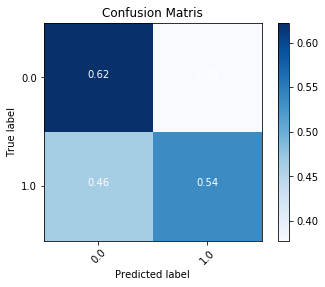

In [21]:
#NAIVE BAYES ALGORITHM (ORJINAL VERİ ÜZERİNE ETKİSİ)

gnb = GaussianNB()
gnb.fit(x_train,y_train)
print("orjinal TRAIN setimin accuary_score= ",gnb.score(x_train,y_train))
y_pred = gnb.predict(x_test)
print("orjinal TEST_1 setimin accuary_score=",accuracy_score(y_test, y_pred))
y_pred2 = gnb.predict(x_test2)
print("orjinal TEST_2 setimin accuary_score=",accuracy_score(y_test2,y_pred2))
print("------------------------------------------------------------------------------------------")
print(confusion_matrix(y_test, y_pred))  
print(classification_report(y_test, y_pred))   
print("------------------------------------------------------------------------------------------")
print(confusion_matrix(y_test2, y_pred2))  
print(classification_report(y_test2, y_pred2))  
mat=confusion_matrix(y_test2,y_pred2)
confusionMatriss(mat,['0.0','1.0'])


C:\ProgramData\Anaconda3\lib\site-packages\sklearn\utils\validation.py:578: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


SCALE EDİLMİŞ TRAIN setimin accuary_score=  0.9788775635515167
SCALE EDİLMİŞ TEST_1 setimin accuary_score= 0.9065666041275797
SCALE EDİLMİŞ TEST_2 setimin accuary_score= 0.9917965545529123
------------------------------------------------------------------------------------------
[[1682   11]
 [ 238  734]]
             precision    recall  f1-score   support

          0       0.88      0.99      0.93      1693
          1       0.99      0.76      0.85       972

avg / total       0.92      0.91      0.90      2665

------------------------------------------------------------------------------------------
[[7638   65]
 [  15 2034]]
             precision    recall  f1-score   support

          0       1.00      0.99      0.99      7703
          1       0.97      0.99      0.98      2049

avg / total       0.99      0.99      0.99      9752



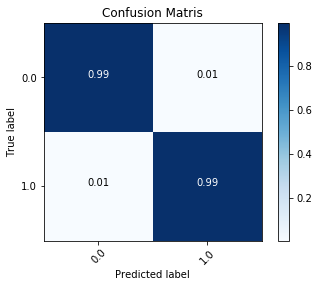

In [22]:
#NAIVE BAYES ALGORITHM (SCALE EDİLMİŞ HALİ ÜZERİNE ETKİSİ)

gnb = GaussianNB()
gnb.fit(X_train,y_train)
print("SCALE EDİLMİŞ TRAIN setimin accuary_score= ",gnb.score(X_train,y_train))
y_pred = gnb.predict(X_test)
print("SCALE EDİLMİŞ TEST_1 setimin accuary_score=",accuracy_score(y_test, y_pred))
y_pred2 = gnb.predict(X_test2)
print("SCALE EDİLMİŞ TEST_2 setimin accuary_score=",accuracy_score(y_test2,y_pred2))
print("------------------------------------------------------------------------------------------")
print(confusion_matrix(y_test, y_pred))  
print(classification_report(y_test, y_pred))   
print("------------------------------------------------------------------------------------------")
print(confusion_matrix(y_test2, y_pred2))  
print(classification_report(y_test2, y_pred2))  
m=confusion_matrix(y_test2,y_pred2)
confusionMatriss(m,['0.0','1.0'])

YENİ FEATURE EKLENMİŞ TRAIN setimin accuary_score=  0.7876703917475132
YENİ FEATURE EKLENMİŞ TEST_1 setimin accuary_score= 0.5924953095684803
YENİ FEATURE EKLENMİŞ TEST_2 setimin accuary_score= 0.6036710418375718
------------------------------------------------------------------------------------------
[[1376  317]
 [ 769  203]]
             precision    recall  f1-score   support

          0       0.64      0.81      0.72      1693
          1       0.39      0.21      0.27       972

avg / total       0.55      0.59      0.55      2665

------------------------------------------------------------------------------------------
[[4790 2913]
 [ 952 1097]]
             precision    recall  f1-score   support

          0       0.83      0.62      0.71      7703
          1       0.27      0.54      0.36      2049

avg / total       0.72      0.60      0.64      9752



C:\ProgramData\Anaconda3\lib\site-packages\sklearn\utils\validation.py:578: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


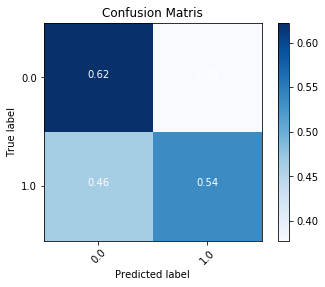

In [23]:
#NAIVE BAYES ALGORITHM (YENİ FEATURE EKLENMİŞ HALİNE ETKİSİ)

gnb = GaussianNB()
gnb.fit(x_train_new,y_train)
print("YENİ FEATURE EKLENMİŞ TRAIN setimin accuary_score= ",gnb.score(x_train_new,y_train))
y_pred = gnb.predict(x_test_new)
print("YENİ FEATURE EKLENMİŞ TEST_1 setimin accuary_score=",accuracy_score(y_test, y_pred))
y_pred2 = gnb.predict(x_test2_new)
print("YENİ FEATURE EKLENMİŞ TEST_2 setimin accuary_score=",accuracy_score(y_test2,y_pred2))
print("------------------------------------------------------------------------------------------")
print(confusion_matrix(y_test, y_pred))  
print(classification_report(y_test, y_pred))   
print("------------------------------------------------------------------------------------------")
print(confusion_matrix(y_test2, y_pred2))  
print(classification_report(y_test2, y_pred2))  
n=confusion_matrix(y_test2,y_pred2)
confusionMatriss(n,['0.0','1.0'])

C:\ProgramData\Anaconda3\lib\site-packages\sklearn\utils\validation.py:578: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


YENİ FEATURE EKLENMİŞ VE SCALE EDİLMİŞ TRAIN setimin accuary_score=  0.9787547586884441
YENİ FEATURE EKLENMİŞ VE SCALE EDİLMİŞ TEST_1 setimin accuary_score= 0.9065666041275797
YENİ FEATURE EKLENMİŞ VE SCALE EDİLMİŞ TEST_2 setimin accuary_score= 0.9917965545529123
------------------------------------------------------------------------------------------
[[1682   11]
 [ 238  734]]
             precision    recall  f1-score   support

          0       0.88      0.99      0.93      1693
          1       0.99      0.76      0.85       972

avg / total       0.92      0.91      0.90      2665

------------------------------------------------------------------------------------------
[[7638   65]
 [  15 2034]]
             precision    recall  f1-score   support

          0       1.00      0.99      0.99      7703
          1       0.97      0.99      0.98      2049

avg / total       0.99      0.99      0.99      9752



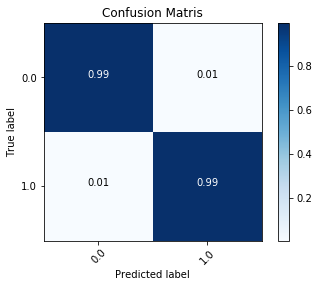

In [133]:
#NAIVE BAYES ALGORITHM (YENİ FEATURE EKLENMİŞ ve SCALE EDİLMİŞ VERİ ÜZERİNDE ETKİSİ)

gnb = GaussianNB()
gnb.fit(X_train_new,y_train)
print("YENİ FEATURE EKLENMİŞ VE SCALE EDİLMİŞ TRAIN setimin accuary_score= ",gnb.score(X_train_new,y_train))
y_pred = gnb.predict(X_test_new)
print("YENİ FEATURE EKLENMİŞ VE SCALE EDİLMİŞ TEST_1 setimin accuary_score=",accuracy_score(y_test, y_pred))
y_pred2 = gnb.predict(X_test2_new)
print("YENİ FEATURE EKLENMİŞ VE SCALE EDİLMİŞ TEST_2 setimin accuary_score=",accuracy_score(y_test2,y_pred2))
print("------------------------------------------------------------------------------------------")
print(confusion_matrix(y_test, y_pred))  
print(classification_report(y_test, y_pred))   
print("------------------------------------------------------------------------------------------")
print(confusion_matrix(y_test2, y_pred2))  
print(classification_report(y_test2, y_pred2))  
nm=confusion_matrix(y_test2,y_pred2)
confusionMatriss(nm,['0.0','1.0'])

# 3.DECISION TREE CLASSIFIER ALGORİTMASI

orjinal TRAIN setimin accuary_score=  1.0
orjinal TEST_1 setimin accuary_score= 0.9778611632270169
orjinal TEST_2 setimin accuary_score= 0.9912838392124692
------------------------------------------------------------------------------------------
[[1637   56]
 [   3  969]]
             precision    recall  f1-score   support

          0       1.00      0.97      0.98      1693
          1       0.95      1.00      0.97       972

avg / total       0.98      0.98      0.98      2665

------------------------------------------------------------------------------------------
[[7630   73]
 [  12 2037]]
             precision    recall  f1-score   support

          0       1.00      0.99      0.99      7703
          1       0.97      0.99      0.98      2049

avg / total       0.99      0.99      0.99      9752



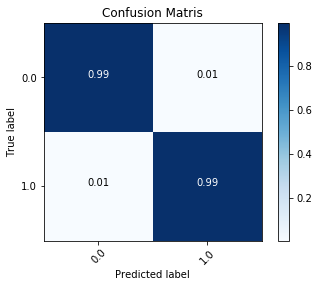

In [24]:
# DecisionTreeClassifier ALGORITHM (ORJINAL VERİ ÜZERİNE ETKİSİ)

classifier = DecisionTreeClassifier(random_state=0)  
classifier.fit(x_train, y_train)
print("orjinal TRAIN setimin accuary_score= ",classifier.score(x_train,y_train))
y_pred = classifier.predict(x_test) 
print("orjinal TEST_1 setimin accuary_score=",accuracy_score(y_test, y_pred))
y_pred2 = classifier.predict(x_test2)
print("orjinal TEST_2 setimin accuary_score=",accuracy_score(y_test2,y_pred2))
print("------------------------------------------------------------------------------------------")
print(confusion_matrix(y_test, y_pred))  
print(classification_report(y_test, y_pred))   
print("------------------------------------------------------------------------------------------")
print(confusion_matrix(y_test2, y_pred2))  
print(classification_report(y_test2, y_pred2))  
onm=confusion_matrix(y_test2,y_pred2)
confusionMatriss(onm,['0.0','1.0'])

SCALE EDİLMİŞ TRAIN setimin accuary_score=  1.0
SCALE EDİLMİŞ TEST_1 setimin accuary_score= 0.9617260787992495
SCALE EDİLMİŞ TEST_2 setimin accuary_score= 0.906070549630845
------------------------------------------------------------------------------------------
[[1647   46]
 [  56  916]]
             precision    recall  f1-score   support

          0       0.97      0.97      0.97      1693
          1       0.95      0.94      0.95       972

avg / total       0.96      0.96      0.96      2665

------------------------------------------------------------------------------------------
[[7381  322]
 [ 594 1455]]
             precision    recall  f1-score   support

          0       0.93      0.96      0.94      7703
          1       0.82      0.71      0.76      2049

avg / total       0.90      0.91      0.90      9752



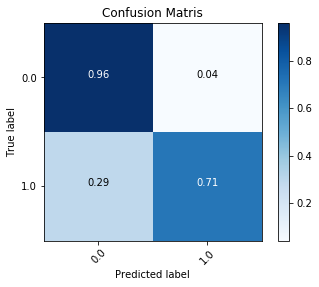

In [135]:
# DecisionTreeClassifier ALGORITHM (SCALE EDİLMİŞ VERİ ÜZERİNDE ETKİSİ)

classifier = DecisionTreeClassifier(criterion='entropy')  
classifier.fit(X_train, y_train)
print("SCALE EDİLMİŞ TRAIN setimin accuary_score= ",classifier.score(X_train,y_train))
y_pred = classifier.predict(X_test) 
print("SCALE EDİLMİŞ TEST_1 setimin accuary_score=",accuracy_score(y_test, y_pred))
y_pred2 = classifier.predict(X_test2)
print("SCALE EDİLMİŞ TEST_2 setimin accuary_score=",accuracy_score(y_test2,y_pred2))
print("------------------------------------------------------------------------------------------")
print(confusion_matrix(y_test, y_pred))  
print(classification_report(y_test, y_pred))   
print("------------------------------------------------------------------------------------------")
print(confusion_matrix(y_test2, y_pred2))  
print(classification_report(y_test2, y_pred2))  
r=confusion_matrix(y_test2,y_pred2)
confusionMatriss(r,['0.0','1.0'])

YENİ FEATURE EKLENMİŞ TRAIN setimin accuary_score=  1.0
YENİ FEATURE EKLENMİŞ TEST_1 setimin accuary_score= 0.9343339587242027
YENİ FEATURE EKLENMİŞ TEST_2 setimin accuary_score= 0.8977645611156686
------------------------------------------------------------------------------------------
[[1653   40]
 [ 135  837]]
             precision    recall  f1-score   support

          0       0.92      0.98      0.95      1693
          1       0.95      0.86      0.91       972

avg / total       0.94      0.93      0.93      2665

------------------------------------------------------------------------------------------
[[6710  993]
 [   4 2045]]
             precision    recall  f1-score   support

          0       1.00      0.87      0.93      7703
          1       0.67      1.00      0.80      2049

avg / total       0.93      0.90      0.90      9752



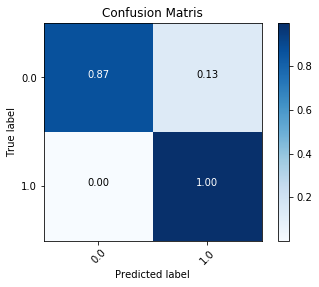

In [25]:
# DecisionTreeClassifier ALGORITHM (YENİ FEATURE EKLENMİŞ HALİNE ETKİSİ)

classifier = DecisionTreeClassifier(criterion='entropy')  
classifier.fit(x_train_new, y_train)
print("YENİ FEATURE EKLENMİŞ TRAIN setimin accuary_score= ",classifier.score(x_train_new,y_train))
y_pred = classifier.predict(x_test_new) 
print("YENİ FEATURE EKLENMİŞ TEST_1 setimin accuary_score=",accuracy_score(y_test, y_pred))
y_pred2 = classifier.predict(x_test2_new)
print("YENİ FEATURE EKLENMİŞ TEST_2 setimin accuary_score=",accuracy_score(y_test2,y_pred2))
print("------------------------------------------------------------------------------------------")
print(confusion_matrix(y_test, y_pred))  
print(classification_report(y_test, y_pred))   
print("------------------------------------------------------------------------------------------")
print(confusion_matrix(y_test2, y_pred2))  
print(classification_report(y_test2, y_pred2))  
t=confusion_matrix(y_test2,y_pred2)
confusionMatriss(t,['0.0','1.0'])

YENİ FEATURE EKLENMİŞ VE SCALE EDİLMİŞ TRAIN setimin accuary_score=  1.0
YENİ FEATURE EKLENMİŞ VE SCALE EDİLMİŞ TEST_1 setimin accuary_score= 0.9617260787992495
YENİ FEATURE EKLENMİŞ VE SCALE EDİLMİŞ TEST_2 setimin accuary_score= 0.932526661197703
------------------------------------------------------------------------------------------
[[1647   46]
 [  56  916]]
             precision    recall  f1-score   support

          0       0.97      0.97      0.97      1693
          1       0.95      0.94      0.95       972

avg / total       0.96      0.96      0.96      2665

------------------------------------------------------------------------------------------
[[7376  327]
 [ 331 1718]]
             precision    recall  f1-score   support

          0       0.96      0.96      0.96      7703
          1       0.84      0.84      0.84      2049

avg / total       0.93      0.93      0.93      9752



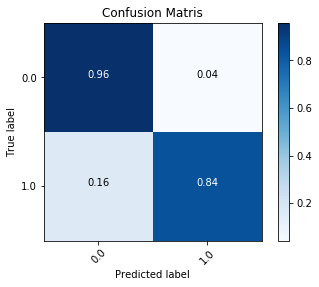

In [26]:
# DecisionTreeClassifier ALGORITHM (YENİ FEATURE EKLENMİŞ ve SCALE EDİLMİŞ VERİ ÜZERİNDE ETKİSİ)

classifier = DecisionTreeClassifier(criterion='entropy')  
classifier.fit(X_train_new, y_train)
print("YENİ FEATURE EKLENMİŞ VE SCALE EDİLMİŞ TRAIN setimin accuary_score= ",classifier.score(X_train_new,y_train))
y_pred = classifier.predict(X_test_new) 
print("YENİ FEATURE EKLENMİŞ VE SCALE EDİLMİŞ TEST_1 setimin accuary_score=",accuracy_score(y_test, y_pred))
y_pred2 = classifier.predict(X_test2_new)
print("YENİ FEATURE EKLENMİŞ VE SCALE EDİLMİŞ TEST_2 setimin accuary_score=",accuracy_score(y_test2,y_pred2))
print("------------------------------------------------------------------------------------------")
print(confusion_matrix(y_test, y_pred))  
print(classification_report(y_test, y_pred))   
print("------------------------------------------------------------------------------------------")
print(confusion_matrix(y_test2, y_pred2))  
print(classification_report(y_test2, y_pred2))  
f=confusion_matrix(y_test2,y_pred2)
confusionMatriss(f,['0.0','1.0'])

# 4.RANDOM FOREST CLASSIFIER ALGORİTMASI

C:\ProgramData\Anaconda3\lib\site-packages\ipykernel_launcher.py:4: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  after removing the cwd from sys.path.
C:\ProgramData\Anaconda3\lib\site-packages\ipykernel_launcher.py:24: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().


orjinal TRAIN setimin accuary_score=  1.0
orjinal TEST_1 setimin accuary_score= 0.9362101313320825
orjinal TEST_2 setimin accuary_score= 0.9912838392124692
------------------------------------------------------------------------------------------
[[1622   71]
 [  99  873]]
             precision    recall  f1-score   support

          0       0.94      0.96      0.95      1693
          1       0.92      0.90      0.91       972

avg / total       0.94      0.94      0.94      2665

------------------------------------------------------------------------------------------
[[7636   67]
 [  18 2031]]
             precision    recall  f1-score   support

          0       1.00      0.99      0.99      7703
          1       0.97      0.99      0.98      2049

avg / total       0.99      0.99      0.99      9752

###########################################################################################################

orjinal TRAIN setimin accuary_score=  1.0
orjinal TEST_1 setimin accu

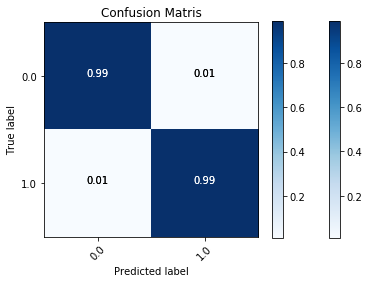

In [30]:
#RANDOM_FOREST_CLASSIFIER ALGORITHM (ORJINAL VERİ ÜZERİNE)

regressor = RandomForestClassifier(n_estimators=10, random_state=0)  
regressor.fit(x_train, y_train)  
y_pred = regressor.predict(x_test)
print("orjinal TRAIN setimin accuary_score= ",regressor.score(x_train,y_train))
y_pred = regressor.predict(x_test) 
print("orjinal TEST_1 setimin accuary_score=",accuracy_score(y_test, y_pred))
y_pred2 = regressor.predict(x_test2)
print("orjinal TEST_2 setimin accuary_score=",accuracy_score(y_test2,y_pred2))
print("------------------------------------------------------------------------------------------")
print(confusion_matrix(y_test, y_pred))  
print(classification_report(y_test, y_pred))   
print("------------------------------------------------------------------------------------------")
print(confusion_matrix(y_test2, y_pred2))  
print(classification_report(y_test2, y_pred2))

regre=confusion_matrix(y_test2,y_pred2)
confusionMatriss(regre,['0.0','1.0'])

print("###########################################################################################################\n")

regressor = RandomForestClassifier(n_estimators=20, random_state=0)  
regressor.fit(x_train, y_train)  
y_pred = regressor.predict(x_test)
print("orjinal TRAIN setimin accuary_score= ",regressor.score(x_train,y_train))
y_pred = regressor.predict(x_test) 
print("orjinal TEST_1 setimin accuary_score=",accuracy_score(y_test, y_pred))
y_pred2 = regressor.predict(x_test2)
print("orjinal TEST_2 setimin accuary_score=",accuracy_score(y_test2,y_pred2))
print("------------------------------------------------------------------------------------------")
print(confusion_matrix(y_test, y_pred))  
print(classification_report(y_test, y_pred))   
print("------------------------------------------------------------------------------------------")
print(confusion_matrix(y_test2, y_pred2))  
print(classification_report(y_test2, y_pred2))  

re=confusion_matrix(y_test2,y_pred2)
confusionMatriss(re,['0.0','1.0'])

C:\ProgramData\Anaconda3\lib\site-packages\ipykernel_launcher.py:4: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  after removing the cwd from sys.path.
C:\ProgramData\Anaconda3\lib\site-packages\ipykernel_launcher.py:23: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().


SCALE EDİLMİŞ TRAIN setimin accuary_score=  0.9996315854107822
SCALE EDİLMİŞ TEST_1 setimin accuary_score= 0.8686679174484052
SCALE EDİLMİŞ TEST_2 setimin accuary_score= 0.9662633305988515
------------------------------------------------------------------------------------------
[[1682   11]
 [ 339  633]]
             precision    recall  f1-score   support

          0       0.83      0.99      0.91      1693
          1       0.98      0.65      0.78       972

avg / total       0.89      0.87      0.86      2665

------------------------------------------------------------------------------------------
[[7659   44]
 [ 285 1764]]
             precision    recall  f1-score   support

          0       0.96      0.99      0.98      7703
          1       0.98      0.86      0.91      2049

avg / total       0.97      0.97      0.97      9752

###########################################################################################################

SCALE EDİLMİŞ TRAIN setimin accuary_

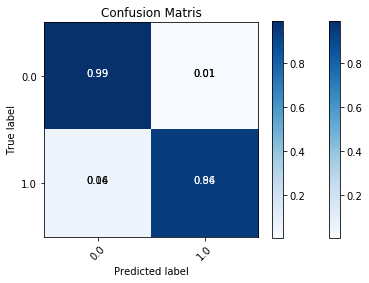

In [31]:
#RANDOM_FOREST_CLASSIFIER ALGORITHM (SCALE EDİLMİŞ HALİ ÜZERİNE ETKİSİ)

regressor = RandomForestClassifier(n_estimators=10, random_state=0)  
regressor.fit(X_train, y_train)  
y_pred = regressor.predict(X_test)
print("SCALE EDİLMİŞ TRAIN setimin accuary_score= ",regressor.score(X_train,y_train))
y_pred = regressor.predict(X_test) 
print("SCALE EDİLMİŞ TEST_1 setimin accuary_score=",accuracy_score(y_test, y_pred))
y_pred2 = regressor.predict(X_test2)
print("SCALE EDİLMİŞ TEST_2 setimin accuary_score=",accuracy_score(y_test2,y_pred2))
print("------------------------------------------------------------------------------------------")
print(confusion_matrix(y_test, y_pred))  
print(classification_report(y_test, y_pred))   
print("------------------------------------------------------------------------------------------")
print(confusion_matrix(y_test2, y_pred2))  
print(classification_report(y_test2, y_pred2))  
lm=confusion_matrix(y_test2,y_pred2)
confusionMatriss(lm,['0.0','1.0'])

print("###########################################################################################################\n")

regressor = RandomForestClassifier(n_estimators=20, random_state=0)  
regressor.fit(X_train, y_train)  
y_pred = regressor.predict(X_test)
print("SCALE EDİLMİŞ TRAIN setimin accuary_score= ",regressor.score(X_train,y_train))
y_pred = regressor.predict(X_test) 
print("SCALE EDİLMİŞ TEST_1 setimin accuary_score=",accuracy_score(y_test, y_pred))
y_pred2 = regressor.predict(X_test2)
print("SCALE EDİLMİŞ TEST_2 setimin accuary_score=",accuracy_score(y_test2,y_pred2))
print("------------------------------------------------------------------------------------------")
print(confusion_matrix(y_test, y_pred))  
print(classification_report(y_test, y_pred))   
print("------------------------------------------------------------------------------------------")
print(confusion_matrix(y_test2, y_pred2))  
print(classification_report(y_test2, y_pred2))
lk=confusion_matrix(y_test2,y_pred2)
confusionMatriss(lk,['0.0','1.0'])


C:\ProgramData\Anaconda3\lib\site-packages\ipykernel_launcher.py:4: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  after removing the cwd from sys.path.
C:\ProgramData\Anaconda3\lib\site-packages\ipykernel_launcher.py:21: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().


YENİ FEATURE EKLENMİŞ TRAIN setimin accuary_score=  1.0
YENİ FEATURE EKLENMİŞ TEST_1 setimin accuary_score= 0.9362101313320825
YENİ FEATURE EKLENMİŞ TEST_2 setimin accuary_score= 0.9912838392124692
------------------------------------------------------------------------------------------
[[1622   71]
 [  99  873]]
             precision    recall  f1-score   support

          0       0.94      0.96      0.95      1693
          1       0.92      0.90      0.91       972

avg / total       0.94      0.94      0.94      2665

------------------------------------------------------------------------------------------
[[7636   67]
 [  18 2031]]
             precision    recall  f1-score   support

          0       1.00      0.99      0.99      7703
          1       0.97      0.99      0.98      2049

avg / total       0.99      0.99      0.99      9752

###########################################################################################################

YENİ FEATURE EKLENMİŞ TRAIN

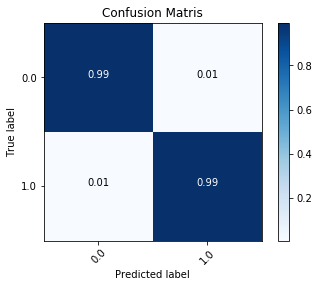

In [32]:
#RANDOM_FOREST_CLASSIFIER ALGORITHM (YENİ FEATURE EKLENMİŞ HALİNE ETKİSİ)

regressor = RandomForestClassifier(n_estimators=10, random_state=0)  
regressor.fit(x_train_new, y_train)  
y_pred = regressor.predict(x_test_new)
print("YENİ FEATURE EKLENMİŞ TRAIN setimin accuary_score= ",regressor.score(x_train_new,y_train))
y_pred = regressor.predict(x_test_new) 
print("YENİ FEATURE EKLENMİŞ TEST_1 setimin accuary_score=",accuracy_score(y_test, y_pred))
y_pred2 = regressor.predict(x_test2_new)
print("YENİ FEATURE EKLENMİŞ TEST_2 setimin accuary_score=",accuracy_score(y_test2,y_pred2))
print("------------------------------------------------------------------------------------------")
print(confusion_matrix(y_test, y_pred))  
print(classification_report(y_test, y_pred))   
print("------------------------------------------------------------------------------------------")
print(confusion_matrix(y_test2, y_pred2))  
print(classification_report(y_test2, y_pred2))  

print("###########################################################################################################\n")

regressor = RandomForestClassifier(n_estimators=20, random_state=0)  
regressor.fit(x_train_new, y_train)  
y_pred = regressor.predict(x_test_new)
print("YENİ FEATURE EKLENMİŞ TRAIN setimin accuary_score= ",regressor.score(x_train_new,y_train))
y_pred = regressor.predict(x_test_new) 
print("YENİ FEATURE EKLENMİŞ TEST_1 setimin accuary_score=",accuracy_score(y_test, y_pred))
y_pred2 = regressor.predict(x_test2_new)
print("YENİ FEATURE EKLENMİŞ TEST_2 setimin accuary_score=",accuracy_score(y_test2,y_pred2))
print("------------------------------------------------------------------------------------------")
print(confusion_matrix(y_test, y_pred))  
print(classification_report(y_test, y_pred))   
print("------------------------------------------------------------------------------------------")
print(confusion_matrix(y_test2, y_pred2))  
print(classification_report(y_test2, y_pred2))  
tmr=confusion_matrix(y_test2,y_pred2)
confusionMatriss(tmr,['0.0','1.0'])

C:\ProgramData\Anaconda3\lib\site-packages\ipykernel_launcher.py:4: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  after removing the cwd from sys.path.
C:\ProgramData\Anaconda3\lib\site-packages\ipykernel_launcher.py:23: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().


YENİ FEATURE EKLENMİŞ VE SCALE EDİLMİŞ TRAIN setimin accuary_score=  1.0
YENİ FEATURE EKLENMİŞ VE SCALE EDİLMİŞ TEST_1 setimin accuary_score= 0.8949343339587242
YENİ FEATURE EKLENMİŞ VE SCALE EDİLMİŞ TEST_2 setimin accuary_score= 0.9422682526661198
------------------------------------------------------------------------------------------
[[1658   35]
 [ 245  727]]
             precision    recall  f1-score   support

          0       0.87      0.98      0.92      1693
          1       0.95      0.75      0.84       972

avg / total       0.90      0.89      0.89      2665

------------------------------------------------------------------------------------------
[[7612   91]
 [ 472 1577]]
             precision    recall  f1-score   support

          0       0.94      0.99      0.96      7703
          1       0.95      0.77      0.85      2049

avg / total       0.94      0.94      0.94      9752

#####################################################################################

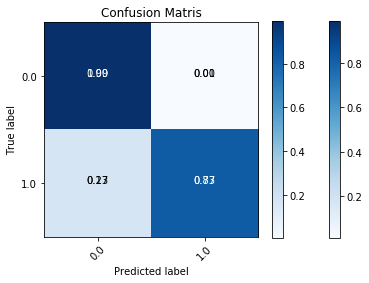

In [33]:
#RANDOM_FOREST_CLASSIFIER ALGORITHM (YENİ FEATURE EKLENMİŞ ve SCALE EDİLMİŞ HALİNE ETKİSİ)

regressor = RandomForestClassifier(n_estimators=10, random_state=0)  
regressor.fit(X_train_new, y_train)  
y_pred = regressor.predict(X_test_new)
print("YENİ FEATURE EKLENMİŞ VE SCALE EDİLMİŞ TRAIN setimin accuary_score= ",regressor.score(X_train_new,y_train))
y_pred = regressor.predict(X_test_new) 
print("YENİ FEATURE EKLENMİŞ VE SCALE EDİLMİŞ TEST_1 setimin accuary_score=",accuracy_score(y_test, y_pred))
y_pred2 = regressor.predict(X_test2_new)
print("YENİ FEATURE EKLENMİŞ VE SCALE EDİLMİŞ TEST_2 setimin accuary_score=",accuracy_score(y_test2,y_pred2))
print("------------------------------------------------------------------------------------------")
print(confusion_matrix(y_test, y_pred))  
print(classification_report(y_test, y_pred))   
print("------------------------------------------------------------------------------------------")
print(confusion_matrix(y_test2, y_pred2))  
print(classification_report(y_test2, y_pred2))  
mk=confusion_matrix(y_test2,y_pred2)
confusionMatriss(mk,['0.0','1.0'])

print("###########################################################################################################\n")

regressor = RandomForestClassifier(n_estimators=20, random_state=0)  
regressor.fit(X_train_new, y_train)  
y_pred = regressor.predict(X_test_new)
print("YENİ FEATURE EKLENMİŞ VE SCALE EDİLMİŞ TRAIN setimin accuary_score= ",regressor.score(X_train_new,y_train))
y_pred = regressor.predict(X_test_new) 
print("YENİ FEATURE EKLENMİŞ VE SCALE EDİLMİŞ TEST_1 setimin accuary_score=",accuracy_score(y_test, y_pred))
y_pred2 = regressor.predict(X_test2_new)
print("YENİ FEATURE EKLENMİŞ VE SCALE EDİLMİŞ TEST_2 setimin accuary_score=",accuracy_score(y_test2,y_pred2))
print("------------------------------------------------------------------------------------------")
print(confusion_matrix(y_test, y_pred))  
print(classification_report(y_test, y_pred))   
print("------------------------------------------------------------------------------------------")
print(confusion_matrix(y_test2, y_pred2))  
print(classification_report(y_test2, y_pred2))  
mt=confusion_matrix(y_test2,y_pred2)
confusionMatriss(mt,['0.0','1.0'])

# 5.GRADIENT BOOSTED MACHINES ALGORİTMASI

C:\ProgramData\Anaconda3\lib\site-packages\sklearn\utils\validation.py:578: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


orjinal TRAIN setimin accuary_score=  0.9891931720496132
orjinal TEST_1 setimin accuary_score= 0.9782363977485928
orjinal TEST_2 setimin accuary_score= 0.993129614438064 

------------------------------------------------------------------------------------------
[[1640   53]
 [   5  967]]
             precision    recall  f1-score   support

          0       1.00      0.97      0.98      1693
          1       0.95      0.99      0.97       972

avg / total       0.98      0.98      0.98      2665

------------------------------------------------------------------------------------------
[[7648   55]
 [  12 2037]]
             precision    recall  f1-score   support

          0       1.00      0.99      1.00      7703
          1       0.97      0.99      0.98      2049

avg / total       0.99      0.99      0.99      9752

########################################################################################################


C:\ProgramData\Anaconda3\lib\site-packages\sklearn\utils\validation.py:578: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


orjinal TRAIN setimin accuary_score=  1.0
orjinal TEST_1 setimin accuary_score= 0.9778611632270169
orjinal TEST_2 setimin accuary_score= 0.9830803937653815 

------------------------------------------------------------------------------------------
[[1639   54]
 [   5  967]]
             precision    recall  f1-score   support

          0       1.00      0.97      0.98      1693
          1       0.95      0.99      0.97       972

avg / total       0.98      0.98      0.98      2665

------------------------------------------------------------------------------------------
[[7546  157]
 [   8 2041]]
             precision    recall  f1-score   support

          0       1.00      0.98      0.99      7703
          1       0.93      1.00      0.96      2049

avg / total       0.98      0.98      0.98      9752



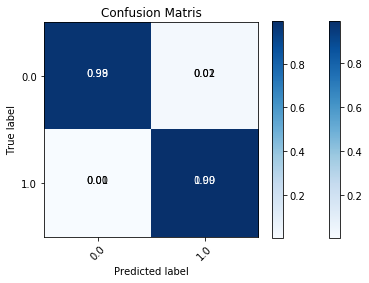

In [34]:
#GRADIENT BOOSTED MACHINES(ORJINAL HALİNE ETKİSİ)

gradientClassifier = GradientBoostingClassifier(random_state=0, max_depth=2, learning_rate=0.01)
gradientClassifier.fit(x_train, y_train) 
print("orjinal TRAIN setimin accuary_score= ",gradientClassifier.score(x_train,y_train))
y_pred = gradientClassifier.predict(x_test)
print("orjinal TEST_1 setimin accuary_score=",accuracy_score(y_test, y_pred))
y_pred2= gradientClassifier.predict(x_test2)
print("orjinal TEST_2 setimin accuary_score=",accuracy_score(y_test2,y_pred2),"\n")
print("------------------------------------------------------------------------------------------")
print(confusion_matrix(y_test, y_pred))  
print(classification_report(y_test, y_pred))   
print("------------------------------------------------------------------------------------------")
print(confusion_matrix(y_test2, y_pred2))  
print(classification_report(y_test2, y_pred2)) 

tr=confusion_matrix(y_test2,y_pred2)
confusionMatriss(tr,['0.0','1.0'])

print("########################################################################################################")

gradientClassifier = GradientBoostingClassifier(random_state=0, max_depth=20, learning_rate=0.01)
gradientClassifier.fit(x_train, y_train) 
print("orjinal TRAIN setimin accuary_score= ",gradientClassifier.score(x_train,y_train))
y_pred = gradientClassifier.predict(x_test)
print("orjinal TEST_1 setimin accuary_score=",accuracy_score(y_test, y_pred))
y_pred2= gradientClassifier.predict(x_test2)
print("orjinal TEST_2 setimin accuary_score=",accuracy_score(y_test2,y_pred2),"\n")
print("------------------------------------------------------------------------------------------")
print(confusion_matrix(y_test, y_pred))  
print(classification_report(y_test, y_pred))   
print("------------------------------------------------------------------------------------------")
print(confusion_matrix(y_test2, y_pred2))  
print(classification_report(y_test2, y_pred2))  

tk=confusion_matrix(y_test2,y_pred2)
confusionMatriss(tk,['0.0','1.0'])

C:\ProgramData\Anaconda3\lib\site-packages\sklearn\utils\validation.py:578: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


SCALE EDİLMİŞ TRAIN setimin accuary_score=  0.9891931720496132
SCALE EDİLMİŞ TEST_1 setimin accuary_score= 0.7444652908067543
SCALE EDİLMİŞ TEST_2 setimin accuary_score= 0.9543683347005743 

------------------------------------------------------------------------------------------
[[1682   11]
 [ 670  302]]
             precision    recall  f1-score   support

          0       0.72      0.99      0.83      1693
          1       0.96      0.31      0.47       972

avg / total       0.81      0.74      0.70      2665

------------------------------------------------------------------------------------------
[[7671   32]
 [ 413 1636]]
             precision    recall  f1-score   support

          0       0.95      1.00      0.97      7703
          1       0.98      0.80      0.88      2049

avg / total       0.96      0.95      0.95      9752

########################################################################################################


C:\ProgramData\Anaconda3\lib\site-packages\sklearn\utils\validation.py:578: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


SCALE EDİLMİŞ TRAIN setimin accuary_score=  1.0
SCALE EDİLMİŞ TEST_1 setimin accuary_score= 0.8540337711069418
SCALE EDİLMİŞ TEST_2 setimin accuary_score= 0.9315012305168171 

------------------------------------------------------------------------------------------
[[1659   34]
 [ 355  617]]
             precision    recall  f1-score   support

          0       0.82      0.98      0.90      1693
          1       0.95      0.63      0.76       972

avg / total       0.87      0.85      0.85      2665

------------------------------------------------------------------------------------------
[[7676   27]
 [ 641 1408]]
             precision    recall  f1-score   support

          0       0.92      1.00      0.96      7703
          1       0.98      0.69      0.81      2049

avg / total       0.94      0.93      0.93      9752



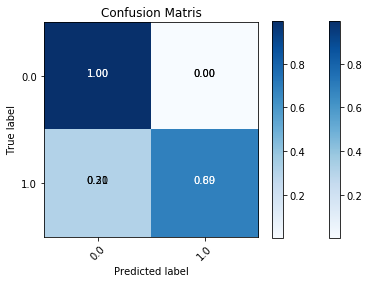

In [35]:
#GRADIENT BOOSTED MACHINES(SCALE EDİLMİŞ HALİ ÜZERİNE ETKİSİ)

gradientClassifier = GradientBoostingClassifier(random_state=0, max_depth=2, learning_rate=0.01)
gradientClassifier.fit(X_train, y_train) 
print("SCALE EDİLMİŞ TRAIN setimin accuary_score= ",gradientClassifier.score(X_train,y_train))
y_pred = gradientClassifier.predict(X_test)
print("SCALE EDİLMİŞ TEST_1 setimin accuary_score=",accuracy_score(y_test, y_pred))
y_pred2= gradientClassifier.predict(X_test2) 
print("SCALE EDİLMİŞ TEST_2 setimin accuary_score=",accuracy_score(y_test2,y_pred2),"\n")
print("------------------------------------------------------------------------------------------")
print(confusion_matrix(y_test, y_pred))  
print(classification_report(y_test, y_pred))  
 
print("------------------------------------------------------------------------------------------")
print(confusion_matrix(y_test2, y_pred2))  
print(classification_report(y_test2, y_pred2))   
mta=confusion_matrix(y_test2,y_pred2)
confusionMatriss(mta,['0.0','1.0'])

print("########################################################################################################")

gradientClassifier = GradientBoostingClassifier(random_state=0, max_depth=20, learning_rate=0.01)
gradientClassifier.fit(X_train, y_train) 
print("SCALE EDİLMİŞ TRAIN setimin accuary_score= ",gradientClassifier.score(X_train,y_train))
y_pred = gradientClassifier.predict(X_test)
print("SCALE EDİLMİŞ TEST_1 setimin accuary_score=",accuracy_score(y_test, y_pred))
y_pred2= gradientClassifier.predict(X_test2) 
print("SCALE EDİLMİŞ TEST_2 setimin accuary_score=",accuracy_score(y_test2,y_pred2),"\n")
print("------------------------------------------------------------------------------------------")
print(confusion_matrix(y_test, y_pred))  
print(classification_report(y_test, y_pred))  
 
print("------------------------------------------------------------------------------------------")
print(confusion_matrix(y_test2, y_pred2))  
print(classification_report(y_test2, y_pred2))   
rk=confusion_matrix(y_test2,y_pred2)
confusionMatriss(rk,['0.0','1.0'])

C:\ProgramData\Anaconda3\lib\site-packages\sklearn\utils\validation.py:578: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


YENİ FEATURE EKLENMİŞ TRAIN setimin accuary_score=  0.9891931720496132
YENİ FEATURE EKLENMİŞ Test_1 setimin accuary_score= 0.9782363977485928
YENİ FEATURE EKLENMİŞ Test_2 setimin accuary_score= 0.993129614438064 

------------------------------------------------------------------------------------------
[[1640   53]
 [   5  967]]
             precision    recall  f1-score   support

          0       1.00      0.97      0.98      1693
          1       0.95      0.99      0.97       972

avg / total       0.98      0.98      0.98      2665

------------------------------------------------------------------------------------------
[[7648   55]
 [  12 2037]]
             precision    recall  f1-score   support

          0       1.00      0.99      1.00      7703
          1       0.97      0.99      0.98      2049

avg / total       0.99      0.99      0.99      9752

########################################################################################################


C:\ProgramData\Anaconda3\lib\site-packages\sklearn\utils\validation.py:578: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


YENİ FEATURE EKLENMİŞ TRAIN setimin accuary_score=  1.0
YENİ FEATURE EKLENMİŞ Test_1 setimin accuary_score= 0.9778611632270169
YENİ FEATURE EKLENMİŞ Test_2 setimin accuary_score= 0.9830803937653815 

------------------------------------------------------------------------------------------
[[1639   54]
 [   5  967]]
             precision    recall  f1-score   support

          0       1.00      0.97      0.98      1693
          1       0.95      0.99      0.97       972

avg / total       0.98      0.98      0.98      2665

------------------------------------------------------------------------------------------
[[7546  157]
 [   8 2041]]
             precision    recall  f1-score   support

          0       1.00      0.98      0.99      7703
          1       0.93      1.00      0.96      2049

avg / total       0.98      0.98      0.98      9752



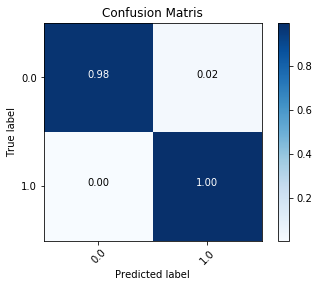

In [37]:
#GRADIENT BOOSTED MACHINES(YENİ FEATURE EKLENMİŞ HALİNE ETKİSİ)

gradientClassifier = GradientBoostingClassifier(random_state=0, max_depth=2, learning_rate=0.01)
gradientClassifier.fit(x_train_new, y_train) 
print("YENİ FEATURE EKLENMİŞ TRAIN setimin accuary_score= ",gradientClassifier.score(x_train_new,y_train))
y_pred = gradientClassifier.predict(x_test_new)
print("YENİ FEATURE EKLENMİŞ Test_1 setimin accuary_score=",accuracy_score(y_test, y_pred))
y_pred2= gradientClassifier.predict(x_test2_new)
print("YENİ FEATURE EKLENMİŞ Test_2 setimin accuary_score=",accuracy_score(y_test2,y_pred2),"\n")
print("------------------------------------------------------------------------------------------")
print(confusion_matrix(y_test, y_pred))  
print(classification_report(y_test, y_pred))  
print("------------------------------------------------------------------------------------------")

print(confusion_matrix(y_test2, y_pred2))  
print(classification_report(y_test2, y_pred2))  

print("########################################################################################################")

gradientClassifier = GradientBoostingClassifier(random_state=0, max_depth=20, learning_rate=0.01)
gradientClassifier.fit(x_train_new, y_train) 
print("YENİ FEATURE EKLENMİŞ TRAIN setimin accuary_score= ",gradientClassifier.score(x_train_new,y_train))
y_pred = gradientClassifier.predict(x_test_new)
print("YENİ FEATURE EKLENMİŞ Test_1 setimin accuary_score=",accuracy_score(y_test, y_pred))
y_pred2= gradientClassifier.predict(x_test2_new)
print("YENİ FEATURE EKLENMİŞ Test_2 setimin accuary_score=",accuracy_score(y_test2,y_pred2),"\n")
print("------------------------------------------------------------------------------------------")
print(confusion_matrix(y_test, y_pred))  
print(classification_report(y_test, y_pred))  
print("------------------------------------------------------------------------------------------")

print(confusion_matrix(y_test2, y_pred2))  
print(classification_report(y_test2, y_pred2))

GRAC=confusion_matrix(y_test2,y_pred2)
confusionMatriss(GRAC,['0.0','1.0'])


C:\ProgramData\Anaconda3\lib\site-packages\sklearn\utils\validation.py:578: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


YENİ FEATURE EKLENMİŞ VE SCALE EDİLMİŞ TRAIN setimin accuary_score=  0.9891931720496132
YENİ FEATURE EKLENMİŞ VE SCALE EDİLMİŞ TEST_1 setimin accuary_score= 0.7444652908067543
YENİ FEATURE EKLENMİŞ VE SCALE EDİLMİŞ TEST_2 setimin accuary_score= 0.9543683347005743 

------------------------------------------------------------------------------------------
[[1682   11]
 [ 670  302]]
             precision    recall  f1-score   support

          0       0.72      0.99      0.83      1693
          1       0.96      0.31      0.47       972

avg / total       0.81      0.74      0.70      2665

------------------------------------------------------------------------------------------
[[7671   32]
 [ 413 1636]]
             precision    recall  f1-score   support

          0       0.95      1.00      0.97      7703
          1       0.98      0.80      0.88      2049

avg / total       0.96      0.95      0.95      9752

####################################################################

C:\ProgramData\Anaconda3\lib\site-packages\sklearn\utils\validation.py:578: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


YENİ FEATURE EKLENMİŞ VE SCALE EDİLMİŞ TRAIN setimin accuary_score=  1.0
YENİ FEATURE EKLENMİŞ VE SCALE EDİLMİŞ TEST_1 setimin accuary_score= 0.8697936210131332
YENİ FEATURE EKLENMİŞ VE SCALE EDİLMİŞ TEST_2 setimin accuary_score= 0.9322190319934373 

------------------------------------------------------------------------------------------
[[1650   43]
 [ 304  668]]
             precision    recall  f1-score   support

          0       0.84      0.97      0.90      1693
          1       0.94      0.69      0.79       972

avg / total       0.88      0.87      0.86      2665

------------------------------------------------------------------------------------------
[[7673   30]
 [ 631 1418]]
             precision    recall  f1-score   support

          0       0.92      1.00      0.96      7703
          1       0.98      0.69      0.81      2049

avg / total       0.94      0.93      0.93      9752



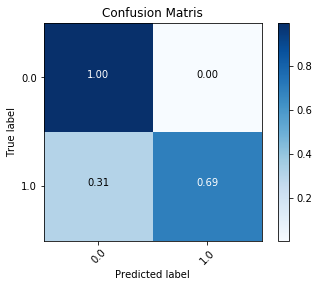

In [38]:
#GRADIENT BOOSTED MACHINES(YENİ FEATURE EKLENMİŞ ve SCALE EDİLMİŞ HALİNE ETKİSİ)

gradientClassifier = GradientBoostingClassifier(random_state=0, max_depth=2, learning_rate=0.01)
gradientClassifier.fit(X_train_new, y_train) 
print("YENİ FEATURE EKLENMİŞ VE SCALE EDİLMİŞ TRAIN setimin accuary_score= ",gradientClassifier.score(X_train_new,y_train))
y_pred = gradientClassifier.predict(X_test_new)
print("YENİ FEATURE EKLENMİŞ VE SCALE EDİLMİŞ TEST_1 setimin accuary_score=",accuracy_score(y_test, y_pred))
y_pred2= gradientClassifier.predict(X_test2_new) 
print("YENİ FEATURE EKLENMİŞ VE SCALE EDİLMİŞ TEST_2 setimin accuary_score=",accuracy_score(y_test2,y_pred2),"\n")
print("------------------------------------------------------------------------------------------")
print(confusion_matrix(y_test, y_pred))  
print(classification_report(y_test, y_pred))  
print("------------------------------------------------------------------------------------------")
print(confusion_matrix(y_test2, y_pred2))  
print(classification_report(y_test2, y_pred2))
print("########################################################################################################")

gradientClassifier = GradientBoostingClassifier(random_state=0, max_depth=20, learning_rate=0.01)
gradientClassifier.fit(X_train_new, y_train) 
print("YENİ FEATURE EKLENMİŞ VE SCALE EDİLMİŞ TRAIN setimin accuary_score= ",gradientClassifier.score(X_train_new,y_train))
y_pred = gradientClassifier.predict(X_test_new)
print("YENİ FEATURE EKLENMİŞ VE SCALE EDİLMİŞ TEST_1 setimin accuary_score=",accuracy_score(y_test, y_pred))
y_pred2= gradientClassifier.predict(X_test2_new) 
print("YENİ FEATURE EKLENMİŞ VE SCALE EDİLMİŞ TEST_2 setimin accuary_score=",accuracy_score(y_test2,y_pred2),"\n")
print("------------------------------------------------------------------------------------------")
print(confusion_matrix(y_test, y_pred))  
print(classification_report(y_test, y_pred))  
print("------------------------------------------------------------------------------------------")
print(confusion_matrix(y_test2, y_pred2))  
print(classification_report(y_test2, y_pred2))

GRACF=confusion_matrix(y_test2,y_pred2)
confusionMatriss(GRACF,['0.0','1.0'])


# 6.KERNELIZED SUPPORT VECTOR MACHINE ALGORİTMASI

C:\ProgramData\Anaconda3\lib\site-packages\sklearn\utils\validation.py:578: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


orjinal TRAIN setimin accuary_score=  1.0
orjinal TEST_1 setimin accuary_score= 0.6352720450281426
orjinal TEST_2 setimin accuary_score= 0.7898892534864643 

------------------------------------------------------------------------------------------
[[1693    0]
 [ 972    0]]
             precision    recall  f1-score   support

          0       0.64      1.00      0.78      1693
          1       0.00      0.00      0.00       972

avg / total       0.40      0.64      0.49      2665

------------------------------------------------------------------------------------------
[[7703    0]
 [2049    0]]
             precision    recall  f1-score   support

          0       0.79      1.00      0.88      7703
          1       0.00      0.00      0.00      2049

avg / total       0.62      0.79      0.70      9752

########################################################################################################


C:\ProgramData\Anaconda3\lib\site-packages\sklearn\metrics\classification.py:1135: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\metrics\classification.py:1135: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\utils\validation.py:578: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


orjinal TRAIN setimin accuary_score=  1.0
orjinal TEST_1 setimin accuary_score= 0.6352720450281426
orjinal TEST_2 setimin accuary_score= 0.7898892534864643 

------------------------------------------------------------------------------------------
[[1693    0]
 [ 972    0]]
             precision    recall  f1-score   support

          0       0.64      1.00      0.78      1693
          1       0.00      0.00      0.00       972

avg / total       0.40      0.64      0.49      2665

------------------------------------------------------------------------------------------
[[7703    0]
 [2049    0]]
             precision    recall  f1-score   support

          0       0.79      1.00      0.88      7703
          1       0.00      0.00      0.00      2049

avg / total       0.62      0.79      0.70      9752



C:\ProgramData\Anaconda3\lib\site-packages\sklearn\metrics\classification.py:1135: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\metrics\classification.py:1135: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)


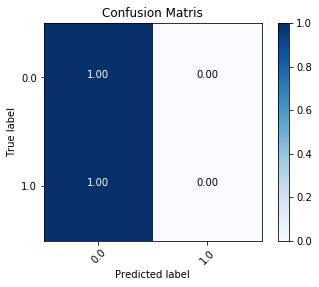

In [43]:
#KERNELIZED SUPPORT VEKTOR MACHINE(ORJINAL HALİ ÜZERİNE ETKİSİ)

svc= SVC(kernel='rbf', C=1, gamma=1)
svc.fit(x_train, y_train) 
print("orjinal TRAIN setimin accuary_score= ",svc.score(x_train,y_train))
y_pred = svc.predict(x_test)
print("orjinal TEST_1 setimin accuary_score=",accuracy_score(y_test, y_pred))
y_pred2= svc.predict(x_test2)
print("orjinal TEST_2 setimin accuary_score=",accuracy_score(y_test2,y_pred2),"\n")

print("------------------------------------------------------------------------------------------")
print(confusion_matrix(y_test, y_pred))  
print(classification_report(y_test, y_pred))  
print("------------------------------------------------------------------------------------------")
print(confusion_matrix(y_test2, y_pred2))  
print(classification_report(y_test2, y_pred2))   

k=confusion_matrix(y_test2,y_pred2)
confusionMatriss(k,['0.0','1.0'])
print("########################################################################################################")

svc= SVC(kernel='rbf', C=7, gamma=1)
svc.fit(x_train, y_train) 
print("orjinal TRAIN setimin accuary_score= ",svc.score(x_train,y_train))
y_pred = svc.predict(x_test)
print("orjinal TEST_1 setimin accuary_score=",accuracy_score(y_test, y_pred))
y_pred2= svc.predict(x_test2)
print("orjinal TEST_2 setimin accuary_score=",accuracy_score(y_test2,y_pred2),"\n")

print("------------------------------------------------------------------------------------------")
print(confusion_matrix(y_test, y_pred))  
print(classification_report(y_test, y_pred))  
print("------------------------------------------------------------------------------------------")
print(confusion_matrix(y_test2, y_pred2))  
print(classification_report(y_test2, y_pred2))   

C:\ProgramData\Anaconda3\lib\site-packages\sklearn\utils\validation.py:578: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


SCALE EDİLMİŞ TRAIN setimin accuary_score=  0.9932457325310082
SCALE EDİLMİŞ TEST_1 setimin accuary_score= 0.8367729831144465
SCALE EDİLMİŞ TEST_2 setimin accuary_score= 0.895611156685808 

------------------------------------------------------------------------------------------
[[1647   46]
 [ 389  583]]
             precision    recall  f1-score   support

          0       0.81      0.97      0.88      1693
          1       0.93      0.60      0.73       972

avg / total       0.85      0.84      0.83      2665

------------------------------------------------------------------------------------------
[[7686   17]
 [1001 1048]]
             precision    recall  f1-score   support

          0       0.88      1.00      0.94      7703
          1       0.98      0.51      0.67      2049

avg / total       0.91      0.90      0.88      9752

########################################################################################################


C:\ProgramData\Anaconda3\lib\site-packages\sklearn\utils\validation.py:578: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


SCALE EDİLMİŞ TRAIN setimin accuary_score=  0.9943509762986614
SCALE EDİLMİŞ TEST_1 setimin accuary_score= 0.8724202626641651
SCALE EDİLMİŞ TEST_2 setimin accuary_score= 0.958264971287941 

------------------------------------------------------------------------------------------
[[1641   52]
 [ 288  684]]
             precision    recall  f1-score   support

          0       0.85      0.97      0.91      1693
          1       0.93      0.70      0.80       972

avg / total       0.88      0.87      0.87      2665

------------------------------------------------------------------------------------------
[[7678   25]
 [ 382 1667]]
             precision    recall  f1-score   support

          0       0.95      1.00      0.97      7703
          1       0.99      0.81      0.89      2049

avg / total       0.96      0.96      0.96      9752



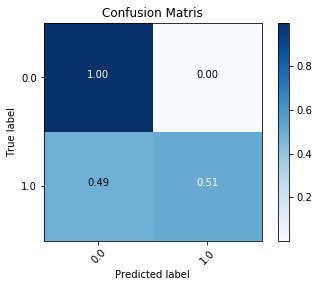

In [41]:
#KERNELIZED SUPPORT VEKTOR MACHINE(SCALE EDİLMİŞ HALİ ÜZERİNE ETKİSİ)

svc= SVC(kernel='rbf', C=1, gamma=1)
svc.fit(X_train, y_train) 
print("SCALE EDİLMİŞ TRAIN setimin accuary_score= ",svc.score(X_train,y_train))
y_pred = svc.predict(X_test)
print("SCALE EDİLMİŞ TEST_1 setimin accuary_score=",accuracy_score(y_test, y_pred))
y_pred2= svc.predict(X_test2)
print("SCALE EDİLMİŞ TEST_2 setimin accuary_score=",accuracy_score(y_test2,y_pred2),"\n")
print("------------------------------------------------------------------------------------------")
print(confusion_matrix(y_test, y_pred))  
print(classification_report(y_test, y_pred))  
print("------------------------------------------------------------------------------------------")
print(confusion_matrix(y_test2, y_pred2))  
print(classification_report(y_test2, y_pred2))  

yt=confusion_matrix(y_test2,y_pred2)
confusionMatriss(yt,['0.0','1.0'])
print("########################################################################################################")
svc= SVC(kernel='rbf', C=7, gamma=1)
svc.fit(X_train, y_train) 
print("SCALE EDİLMİŞ TRAIN setimin accuary_score= ",svc.score(X_train,y_train))
y_pred = svc.predict(X_test)
print("SCALE EDİLMİŞ TEST_1 setimin accuary_score=",accuracy_score(y_test, y_pred))
y_pred2= svc.predict(X_test2)
print("SCALE EDİLMİŞ TEST_2 setimin accuary_score=",accuracy_score(y_test2,y_pred2),"\n")
print("------------------------------------------------------------------------------------------")
print(confusion_matrix(y_test, y_pred))  
print(classification_report(y_test, y_pred))  
print("------------------------------------------------------------------------------------------")
print(confusion_matrix(y_test2, y_pred2))  
print(classification_report(y_test2, y_pred2))  

C:\ProgramData\Anaconda3\lib\site-packages\sklearn\utils\validation.py:578: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


YENİ FEATURE EKLENMİŞ TRAIN setimin accuary_score=  1.0
YENİ FEATURE EKLENMİŞ TEST_1 setimin accuary_score= 0.6352720450281426
YENİ FEATURE EKLENMİŞ TEST_2 setimin accuary_score= 0.7898892534864643 

------------------------------------------------------------------------------------------
[[1693    0]
 [ 972    0]]
             precision    recall  f1-score   support

          0       0.64      1.00      0.78      1693
          1       0.00      0.00      0.00       972

avg / total       0.40      0.64      0.49      2665

------------------------------------------------------------------------------------------
[[7703    0]
 [2049    0]]
             precision    recall  f1-score   support

          0       0.79      1.00      0.88      7703
          1       0.00      0.00      0.00      2049

avg / total       0.62      0.79      0.70      9752

###############################################################################################


C:\ProgramData\Anaconda3\lib\site-packages\sklearn\metrics\classification.py:1135: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\metrics\classification.py:1135: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\utils\validation.py:578: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


YENİ FEATURE EKLENMİŞ TRAIN setimin accuary_score=  1.0
YENİ FEATURE EKLENMİŞ TEST_1 setimin accuary_score= 0.6352720450281426
YENİ FEATURE EKLENMİŞ TEST_2 setimin accuary_score= 0.7898892534864643 

------------------------------------------------------------------------------------------
[[1693    0]
 [ 972    0]]
             precision    recall  f1-score   support

          0       0.64      1.00      0.78      1693
          1       0.00      0.00      0.00       972

avg / total       0.40      0.64      0.49      2665

------------------------------------------------------------------------------------------
[[7703    0]
 [2049    0]]
             precision    recall  f1-score   support

          0       0.79      1.00      0.88      7703
          1       0.00      0.00      0.00      2049

avg / total       0.62      0.79      0.70      9752



C:\ProgramData\Anaconda3\lib\site-packages\sklearn\metrics\classification.py:1135: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\metrics\classification.py:1135: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)


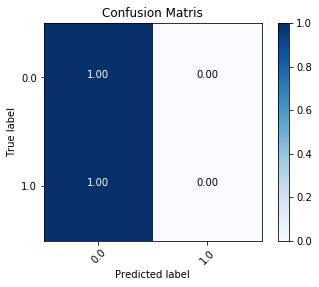

In [39]:
#KERNELIZED SUPPORT VEKTOR MACHINE(YENİ FEARTURE EKLENDİKTEN SONRA)

svc= SVC(kernel='rbf', C=1, gamma=1)
svc.fit(x_train_new, y_train)
print("YENİ FEATURE EKLENMİŞ TRAIN setimin accuary_score= ",svc.score(x_train_new,y_train))
y_pred = svc.predict(x_test_new)
print("YENİ FEATURE EKLENMİŞ TEST_1 setimin accuary_score=",accuracy_score(y_test, y_pred))
y_pred2= svc.predict(x_test2_new)
print("YENİ FEATURE EKLENMİŞ TEST_2 setimin accuary_score=",accuracy_score(y_test2,y_pred2),"\n")
print("------------------------------------------------------------------------------------------")

print(confusion_matrix(y_test, y_pred))  
print(classification_report(y_test, y_pred))  
print("------------------------------------------------------------------------------------------")
print(confusion_matrix(y_test2, y_pred2))  
print(classification_report(y_test2, y_pred2))  

print("###############################################################################################")

svc= SVC(kernel='rbf', C=7, gamma=1)
svc.fit(x_train_new, y_train)
print("YENİ FEATURE EKLENMİŞ TRAIN setimin accuary_score= ",svc.score(x_train_new,y_train))
y_pred = svc.predict(x_test_new)
print("YENİ FEATURE EKLENMİŞ TEST_1 setimin accuary_score=",accuracy_score(y_test, y_pred))
y_pred2= svc.predict(x_test2_new)
print("YENİ FEATURE EKLENMİŞ TEST_2 setimin accuary_score=",accuracy_score(y_test2,y_pred2),"\n")
print("------------------------------------------------------------------------------------------")

print(confusion_matrix(y_test, y_pred))  
print(classification_report(y_test, y_pred))  
print("------------------------------------------------------------------------------------------")
print(confusion_matrix(y_test2, y_pred2))  
print(classification_report(y_test2, y_pred2))

yre=confusion_matrix(y_test2,y_pred2)
confusionMatriss(yre,['0.0','1.0'])

C:\ProgramData\Anaconda3\lib\site-packages\sklearn\utils\validation.py:578: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


YENİ FEATURE EKLENMİŞ VE SCALE EDİLMİŞ TRAIN setimin accuary_score=  0.9933685373940808
YENİ FEATURE EKLENMİŞ VE SCALE EDİLMİŞ TEST_1 setimin accuary_score= 0.7673545966228893
YENİ FEATURE EKLENMİŞ VE SCALE EDİLMİŞ TEST_2 setimin accuary_score= 0.894585726004922 

------------------------------------------------------------------------------------------
[[1654   39]
 [ 581  391]]
             precision    recall  f1-score   support

          0       0.74      0.98      0.84      1693
          1       0.91      0.40      0.56       972

avg / total       0.80      0.77      0.74      2665

------------------------------------------------------------------------------------------
[[7687   16]
 [1012 1037]]
             precision    recall  f1-score   support

          0       0.88      1.00      0.94      7703
          1       0.98      0.51      0.67      2049

avg / total       0.90      0.89      0.88      9752

#####################################################################

C:\ProgramData\Anaconda3\lib\site-packages\sklearn\utils\validation.py:578: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


YENİ FEATURE EKLENMİŞ VE SCALE EDİLMİŞ TRAIN setimin accuary_score=  0.9942281714355888
YENİ FEATURE EKLENMİŞ VE SCALE EDİLMİŞ TEST_1 setimin accuary_score= 0.8146341463414634
YENİ FEATURE EKLENMİŞ VE SCALE EDİLMİŞ TEST_2 setimin accuary_score= 0.9159146841673503 

------------------------------------------------------------------------------------------
[[1646   47]
 [ 447  525]]
             precision    recall  f1-score   support

          0       0.79      0.97      0.87      1693
          1       0.92      0.54      0.68       972

avg / total       0.83      0.81      0.80      2665

------------------------------------------------------------------------------------------
[[7685   18]
 [ 802 1247]]
             precision    recall  f1-score   support

          0       0.91      1.00      0.95      7703
          1       0.99      0.61      0.75      2049

avg / total       0.92      0.92      0.91      9752



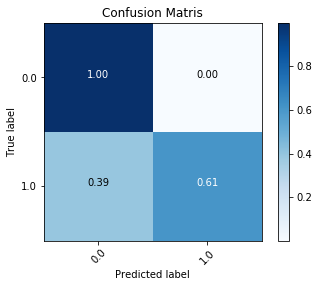

In [40]:
#KERNELIZED SUPPORT VEKTOR MACHINE(YENİ FEARTURE EKLENDİKTEN VE SCALE EDİLDİKTEN SONRA)

svc= SVC(kernel='rbf', C=1, gamma=1)
svc.fit(X_train_new, y_train) 
print("YENİ FEATURE EKLENMİŞ VE SCALE EDİLMİŞ TRAIN setimin accuary_score= ",svc.score(X_train_new,y_train))
y_pred = svc.predict(X_test_new)
print("YENİ FEATURE EKLENMİŞ VE SCALE EDİLMİŞ TEST_1 setimin accuary_score=",accuracy_score(y_test, y_pred))
y_pred2= svc.predict(X_test2_new)
print("YENİ FEATURE EKLENMİŞ VE SCALE EDİLMİŞ TEST_2 setimin accuary_score=",accuracy_score(y_test2,y_pred2),"\n")

print("------------------------------------------------------------------------------------------")
print(confusion_matrix(y_test, y_pred))  
print(classification_report(y_test, y_pred))  

print("------------------------------------------------------------------------------------------")
print(confusion_matrix(y_test2, y_pred2))  
print(classification_report(y_test2, y_pred2))   

print("###############################################################################################")



svc= SVC(kernel='rbf', C=7, gamma=1)
svc.fit(X_train_new, y_train) 
print("YENİ FEATURE EKLENMİŞ VE SCALE EDİLMİŞ TRAIN setimin accuary_score= ",svc.score(X_train_new,y_train))
y_pred = svc.predict(X_test_new)
print("YENİ FEATURE EKLENMİŞ VE SCALE EDİLMİŞ TEST_1 setimin accuary_score=",accuracy_score(y_test, y_pred))
y_pred2= svc.predict(X_test2_new)
print("YENİ FEATURE EKLENMİŞ VE SCALE EDİLMİŞ TEST_2 setimin accuary_score=",accuracy_score(y_test2,y_pred2),"\n")

print("------------------------------------------------------------------------------------------")
print(confusion_matrix(y_test, y_pred))  
print(classification_report(y_test, y_pred))  

print("------------------------------------------------------------------------------------------")
print(confusion_matrix(y_test2, y_pred2))  
print(classification_report(y_test2, y_pred2))   
yre=confusion_matrix(y_test2,y_pred2)
confusionMatriss(yre,['0.0','1.0'])

# 7.LOGISTIC REGRESSION ALGORİTMASI

C:\ProgramData\Anaconda3\lib\site-packages\sklearn\utils\validation.py:578: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


orjinal TRAIN setimin accuary_score=  0.7876703917475132
orjinal TEST_1 setimin accuary_score= 0.6352720450281426
orjinal TEST_2 setimin accuary_score= 0.7898892534864643 

------------------------------------------------------------------------------------------
[[1693    0]
 [ 972    0]]
             precision    recall  f1-score   support

          0       0.64      1.00      0.78      1693
          1       0.00      0.00      0.00       972

avg / total       0.40      0.64      0.49      2665

------------------------------------------------------------------------------------------
[[7703    0]
 [2049    0]]
             precision    recall  f1-score   support

          0       0.79      1.00      0.88      7703
          1       0.00      0.00      0.00      2049

avg / total       0.62      0.79      0.70      9752

########################################################################################################
orjinal TRAIN setimin accuary_score= 

C:\ProgramData\Anaconda3\lib\site-packages\sklearn\metrics\classification.py:1135: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\metrics\classification.py:1135: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\utils\validation.py:578: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\metrics\classification.py:1135: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', aver

 0.7876703917475132
orjinal TEST_1 setimin accuary_score= 0.6352720450281426
orjinal TEST_2 setimin accuary_score= 0.7898892534864643 

------------------------------------------------------------------------------------------
[[1693    0]
 [ 972    0]]
             precision    recall  f1-score   support

          0       0.64      1.00      0.78      1693
          1       0.00      0.00      0.00       972

avg / total       0.40      0.64      0.49      2665

------------------------------------------------------------------------------------------
[[7703    0]
 [2049    0]]
             precision    recall  f1-score   support

          0       0.79      1.00      0.88      7703
          1       0.00      0.00      0.00      2049

avg / total       0.62      0.79      0.70      9752



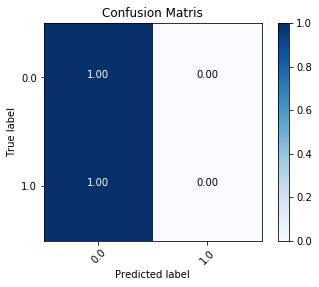

In [45]:
#LOGISTIC REGRESSION (ORJINAL HALİ ÜZERİNE ETKİSİ)

logregression = LogisticRegression(random_state=0, solver='lbfgs',multi_class='multinomial')
logregression .fit(x_train,y_train)
print("orjinal TRAIN setimin accuary_score= ",logregression.score(x_train,y_train))
y_pred =logregression .predict(x_test)
print("orjinal TEST_1 setimin accuary_score=",accuracy_score(y_test, y_pred))
y_pred2= logregression.predict(x_test2)
print("orjinal TEST_2 setimin accuary_score=",accuracy_score(y_test2,y_pred2),"\n")

log=confusion_matrix(y_test2,y_pred2)
confusionMatriss(log,['0.0','1.0'])
print("------------------------------------------------------------------------------------------")
print(confusion_matrix(y_test, y_pred))  
print(classification_report(y_test, y_pred))  
print("------------------------------------------------------------------------------------------")
print(confusion_matrix(y_test2, y_pred2))  
print(classification_report(y_test2, y_pred2))  

print("########################################################################################################")

logregression = LogisticRegression(random_state=0, solver='lbfgs',multi_class='multinomial',C=3)
logregression .fit(x_train,y_train)
print("orjinal TRAIN setimin accuary_score= ",logregression.score(x_train,y_train))
y_pred =logregression .predict(x_test)
print("orjinal TEST_1 setimin accuary_score=",accuracy_score(y_test, y_pred))
y_pred2= logregression.predict(x_test2)
print("orjinal TEST_2 setimin accuary_score=",accuracy_score(y_test2,y_pred2),"\n")
print("------------------------------------------------------------------------------------------")
print(confusion_matrix(y_test, y_pred))  
print(classification_report(y_test, y_pred))  
print("------------------------------------------------------------------------------------------")
print(confusion_matrix(y_test2, y_pred2))  
print(classification_report(y_test2, y_pred2))  



C:\ProgramData\Anaconda3\lib\site-packages\sklearn\utils\validation.py:578: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


SCALE EDİLMİŞ TRAIN setimin accuary_score=  0.9860002456097261
SCALE EDİLMİŞ TEST_1 setimin accuary_score= 0.8949343339587242
SCALE EDİLMİŞ TEST_2 setimin accuary_score= 0.9573420836751435 

------------------------------------------------------------------------------------------
[[1672   21]
 [ 259  713]]
             precision    recall  f1-score   support

          0       0.87      0.99      0.92      1693
          1       0.97      0.73      0.84       972

avg / total       0.90      0.89      0.89      2665

------------------------------------------------------------------------------------------
[[7654   49]
 [ 367 1682]]
             precision    recall  f1-score   support

          0       0.95      0.99      0.97      7703
          1       0.97      0.82      0.89      2049

avg / total       0.96      0.96      0.96      9752

########################################################################################################
SCALE EDİLMİŞ TRAIN setimin accuary_sc

C:\ProgramData\Anaconda3\lib\site-packages\sklearn\utils\validation.py:578: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


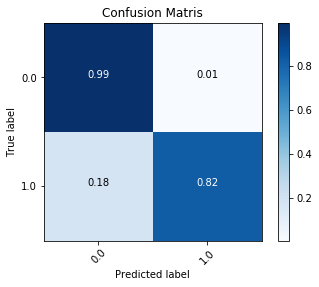

In [125]:
#LOGISTIC REGRESSION (SCALE EDİLDİKTEN SONRA)


logregression = LogisticRegression(random_state=0, solver='lbfgs',multi_class='multinomial',C=1)
logregression .fit(X_train,y_train)
print("SCALE EDİLMİŞ TRAIN setimin accuary_score= ",logregression.score(X_train,y_train))
y_pred =logregression .predict(X_test)
print("SCALE EDİLMİŞ TEST_1 setimin accuary_score=",accuracy_score(y_test, y_pred))
y_pred2= logregression.predict(X_test2)
print("SCALE EDİLMİŞ TEST_2 setimin accuary_score=",accuracy_score(y_test2,y_pred2),"\n")
print("------------------------------------------------------------------------------------------")
print(confusion_matrix(y_test, y_pred))  
print(classification_report(y_test, y_pred))  

print("------------------------------------------------------------------------------------------")
print(confusion_matrix(y_test2, y_pred2))  
print(classification_report(y_test2, y_pred2))  

lo=confusion_matrix(y_test2,y_pred2)
confusionMatriss(lo,['0.0','1.0'])

print("########################################################################################################")

logregression = LogisticRegression(random_state=0, solver='lbfgs',multi_class='multinomial', C=0.1)
logregression .fit(X_train,y_train)
print("SCALE EDİLMİŞ TRAIN setimin accuary_score= ",logregression.score(X_train,y_train))
y_pred =logregression .predict(X_test)
print("SCALE EDİLMİŞ TEST_1 setimin accuary_score=",accuracy_score(y_test, y_pred))
y_pred2= logregression.predict(X_test2)
print("SCALE EDİLMİŞ TEST_2 setimin accuary_score=",accuracy_score(y_test2,y_pred2),"\n")
print("------------------------------------------------------------------------------------------")
print(confusion_matrix(y_test, y_pred))  
print(classification_report(y_test, y_pred))  

print("------------------------------------------------------------------------------------------")
print(confusion_matrix(y_test2, y_pred2))  
print(classification_report(y_test2, y_pred2))  


C:\ProgramData\Anaconda3\lib\site-packages\sklearn\utils\validation.py:578: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


YENİ FEATURE EKLENMİŞ TRAIN setimin accuary_score=  0.7876703917475132
YENİ FEATURE EKLENMİŞYENİ FEATURE EKLENMİŞ TEST_1 setimin accuary_score= 0.6352720450281426
YENİ FEATURE EKLENMİŞ TEST_2 setimin accuary_score= 0.7898892534864643 

------------------------------------------------------------------------------------------
[[1693    0]
 [ 972    0]]
             precision    recall  f1-score   support

          0       0.64      1.00      0.78      1693
          1       0.00      0.00      0.00       972

avg / total       0.40      0.64      0.49      2665

------------------------------------------------------------------------------------------
[[7703    0]
 [2049    0]]
             precision    recall  f1-score   support

          0       0.79      1.00      0.88      7703
          1       0.00      0.00      0.00      2049

avg / total       0.62      0.79      0.70      9752

##################################################################################################

C:\ProgramData\Anaconda3\lib\site-packages\sklearn\metrics\classification.py:1135: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\metrics\classification.py:1135: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\utils\validation.py:578: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\metrics\classification.py:1135: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', aver

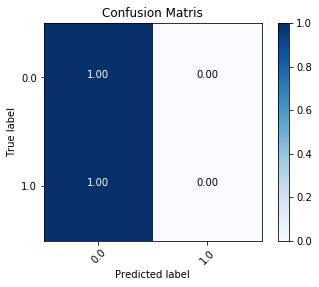

In [41]:
#LOGISTIC REGRESSION (YENİ FEATURE EKLENDİKTEN SONRA)

logregression = LogisticRegression(random_state=0, solver='lbfgs',multi_class='multinomial',C=1)
logregression .fit(x_train_new,y_train)
print("YENİ FEATURE EKLENMİŞ TRAIN setimin accuary_score= ",logregression.score(x_train_new,y_train))
y_pred =logregression .predict(x_test_new)
print("YENİ FEATURE EKLENMİŞYENİ FEATURE EKLENMİŞ TEST_1 setimin accuary_score=",accuracy_score(y_test, y_pred))
y_pred2= logregression.predict(X_test2_new)
print("YENİ FEATURE EKLENMİŞ TEST_2 setimin accuary_score=",accuracy_score(y_test2,y_pred2),"\n")
print("------------------------------------------------------------------------------------------")
print(confusion_matrix(y_test, y_pred))  
print(classification_report(y_test, y_pred))  

print("------------------------------------------------------------------------------------------")
print(confusion_matrix(y_test2, y_pred2))  
print(classification_report(y_test2, y_pred2))  
print("########################################################################################################")

logregression = LogisticRegression(random_state=0, solver='lbfgs',multi_class='multinomial',C=3)
logregression .fit(x_train_new,y_train)
print("YENİ FEATURE EKLENMİŞ TRAIN setimin accuary_score= ",logregression.score(x_train_new,y_train))
y_pred =logregression .predict(x_test_new)
print("YENİ FEATURE EKLENMİŞYENİ FEATURE EKLENMİŞ TEST_1 setimin accuary_score=",accuracy_score(y_test, y_pred))
y_pred2= logregression.predict(X_test2_new)
print("YENİ FEATURE EKLENMİŞ TEST_2 setimin accuary_score=",accuracy_score(y_test2,y_pred2),"\n")
print("------------------------------------------------------------------------------------------")
print(confusion_matrix(y_test, y_pred))  
print(classification_report(y_test, y_pred))  

print("------------------------------------------------------------------------------------------")
print(confusion_matrix(y_test2, y_pred2))  
print(classification_report(y_test2, y_pred2)) 

logrec=confusion_matrix(y_test2,y_pred2)
confusionMatriss(logrec,['0.0','1.0'])

C:\ProgramData\Anaconda3\lib\site-packages\sklearn\utils\validation.py:578: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


YENİ FEATURE EKLENMİŞ SCALE EDİLMİŞ TRAIN setimin accuary_score=  0.9860002456097261
YENİ FEATURE EKLENMİŞYENİ FEATURE EKLENMİŞ TEST_1 setimin accuary_score= 0.8945590994371482
YENİ FEATURE EKLENMİŞ TEST_2 setimin accuary_score= 0.9570344544708778 

------------------------------------------------------------------------------------------
[[1672   21]
 [ 260  712]]
             precision    recall  f1-score   support

          0       0.87      0.99      0.92      1693
          1       0.97      0.73      0.84       972

avg / total       0.90      0.89      0.89      2665

------------------------------------------------------------------------------------------
[[7654   49]
 [ 370 1679]]
             precision    recall  f1-score   support

          0       0.95      0.99      0.97      7703
          1       0.97      0.82      0.89      2049

avg / total       0.96      0.96      0.96      9752

####################################################################################

C:\ProgramData\Anaconda3\lib\site-packages\sklearn\utils\validation.py:578: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)



             precision    recall  f1-score   support

          0       0.95      0.99      0.97      7703
          1       0.97      0.80      0.88      2049

avg / total       0.95      0.95      0.95      9752



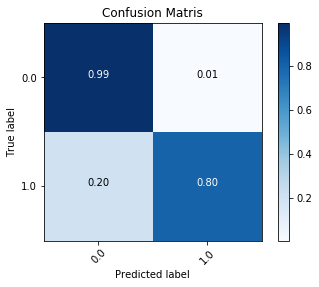

In [42]:
#LOGISTIC REGRESSION (YENİ FEATURE EKLENDİKTEN VE SCALE EDİLDİKTEN SONRA)

logregression = LogisticRegression(random_state=0, solver='lbfgs',multi_class='multinomial',C=1)
logregression .fit(X_train_new,y_train)
print("YENİ FEATURE EKLENMİŞ SCALE EDİLMİŞ TRAIN setimin accuary_score= ",logregression.score(X_train_new,y_train))
y_pred =logregression .predict(X_test_new)
print("YENİ FEATURE EKLENMİŞYENİ FEATURE EKLENMİŞ TEST_1 setimin accuary_score=",accuracy_score(y_test, y_pred))
y_pred2= logregression.predict(X_test2_new)
print("YENİ FEATURE EKLENMİŞ TEST_2 setimin accuary_score=",accuracy_score(y_test2,y_pred2),"\n")
print("------------------------------------------------------------------------------------------")
print(confusion_matrix(y_test, y_pred))  
print(classification_report(y_test, y_pred))  
print("------------------------------------------------------------------------------------------")

print(confusion_matrix(y_test2, y_pred2))  
print(classification_report(y_test2, y_pred2)) 

print("########################################################################################################")

logregression = LogisticRegression(random_state=0, solver='lbfgs',multi_class='multinomial',C=3)
logregression .fit(X_train_new,y_train)
print("YENİ FEATURE EKLENMİŞ SCALE EDİLMİŞ TRAIN setimin accuary_score= ",logregression.score(X_train_new,y_train))
y_pred =logregression .predict(X_test_new)
print("YENİ FEATURE EKLENMİŞYENİ FEATURE EKLENMİŞ TEST_1 setimin accuary_score=",accuracy_score(y_test, y_pred))
y_pred2= logregression.predict(X_test2_new)
print("YENİ FEATURE EKLENMİŞ TEST_2 setimin accuary_score=",accuracy_score(y_test2,y_pred2),"\n")
print("------------------------------------------------------------------------------------------")
print(confusion_matrix(y_test, y_pred))  
print(classification_report(y_test, y_pred))  
print("------------------------------------------------------------------------------------------")

print(confusion_matrix(y_test2, y_pred2))  
print(classification_report(y_test2, y_pred2)) 
logi=confusion_matrix(y_test2,y_pred2)
confusionMatriss(logi,['0.0','1.0'])

# 8.EK ALGORİTMA-QUADRATIC DISCRIMINANT ANALYSIS 

C:\ProgramData\Anaconda3\lib\site-packages\sklearn\utils\validation.py:578: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


orjinal TRAIN setimin accuary_score=  0.9888247574603954
orjinal TEST_1 setimin accuary_score= 0.9771106941838649
orjinal TEST_2 setimin accuary_score= 0.7934782608695652 

------------------------------------------------------------------------------------------
[[1638   55]
 [   6  966]]
             precision    recall  f1-score   support

          0       1.00      0.97      0.98      1693
          1       0.95      0.99      0.97       972

avg / total       0.98      0.98      0.98      2665

------------------------------------------------------------------------------------------
[[7700    3]
 [2011   38]]
             precision    recall  f1-score   support

          0       0.79      1.00      0.88      7703
          1       0.93      0.02      0.04      2049

avg / total       0.82      0.79      0.71      9752



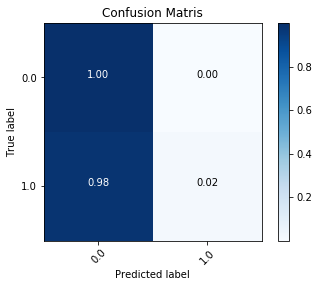

In [46]:
#NEW ALGORITHM---> QUADRATIC DISCRIMINANT ANALYSIS (ORJINAL VERİ ÜZERİNE ETKİSİ)

QDA= QuadraticDiscriminantAnalysis(priors=None, reg_param=0.0,
                              store_covariance=False,
                              store_covariances=None, tol=0.0001)
QDA.fit(x_train, y_train)

print("orjinal TRAIN setimin accuary_score= ",QDA.score(x_train,y_train))
y_pred =QDA.predict(x_test)
print("orjinal TEST_1 setimin accuary_score=",accuracy_score(y_test, y_pred))
y_pred2= QDA.predict(x_test2)
print("orjinal TEST_2 setimin accuary_score=",accuracy_score(y_test2,y_pred2),"\n")

print("------------------------------------------------------------------------------------------")
print(confusion_matrix(y_test, y_pred))  
print(classification_report(y_test, y_pred))  
print("------------------------------------------------------------------------------------------")
print(confusion_matrix(y_test2, y_pred2))  
print(classification_report(y_test2, y_pred2))  

QD=confusion_matrix(y_test2,y_pred2)
confusionMatriss(QD,['0.0','1.0'])


C:\ProgramData\Anaconda3\lib\site-packages\sklearn\utils\validation.py:578: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


SCALE EDİLMİŞ TRAIN setimin accuary_score=  0.9888247574603954
SCALE EDİLMİŞ TEST_1 setimin accuary_score= 0.7140712945590995
SCALE EDİLMİŞ TEST_2 setimin accuary_score= 0.8891509433962265 

------------------------------------------------------------------------------------------
[[1678   15]
 [ 747  225]]
             precision    recall  f1-score   support

          0       0.69      0.99      0.81      1693
          1       0.94      0.23      0.37       972

avg / total       0.78      0.71      0.65      2665

------------------------------------------------------------------------------------------
[[7671   32]
 [1049 1000]]
             precision    recall  f1-score   support

          0       0.88      1.00      0.93      7703
          1       0.97      0.49      0.65      2049

avg / total       0.90      0.89      0.87      9752



C:\ProgramData\Anaconda3\lib\site-packages\sklearn\utils\validation.py:578: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


SCALE EDİLMİŞ VE HYPER PARAMETRE DEĞİŞİMİ İLE TRAIN setimin accuary_score=  0.9783863440992263
SCALE EDİLMİŞ VE HYPER PARAMETRE DEĞİŞİMİ İLE TEST_1 setimin accuary_score= 0.9181988742964353
SCALE EDİLMİŞ VE HYPER PARAMETRE DEĞİŞİMİ İLE TEST_2 setimin accuary_score= 0.9884126333059885 

------------------------------------------------------------------------------------------
[[1658   35]
 [ 183  789]]
             precision    recall  f1-score   support

          0       0.90      0.98      0.94      1693
          1       0.96      0.81      0.88       972

avg / total       0.92      0.92      0.92      2665

------------------------------------------------------------------------------------------
[[7603  100]
 [  13 2036]]
             precision    recall  f1-score   support

          0       1.00      0.99      0.99      7703
          1       0.95      0.99      0.97      2049

avg / total       0.99      0.99      0.99      9752



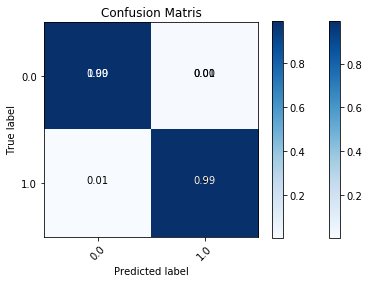

In [126]:
#NEW ALGORITHM---> QUADRATIC DISCRIMINANT ANALYSIS (SCALE EDİLMİŞ VERİ ÜZERİNE ETKİSİ)

QDA= QuadraticDiscriminantAnalysis(priors=None, reg_param=0.0,
                              store_covariance=False,
                              store_covariances=None, tol=0.0001)
QDA.fit(X_train, y_train)

print("SCALE EDİLMİŞ TRAIN setimin accuary_score= ",QDA.score(X_train,y_train))
y_pred =QDA.predict(X_test)
print("SCALE EDİLMİŞ TEST_1 setimin accuary_score=",accuracy_score(y_test, y_pred))
y_pred2= QDA.predict(X_test2)
print("SCALE EDİLMİŞ TEST_2 setimin accuary_score=",accuracy_score(y_test2,y_pred2),"\n")

print("------------------------------------------------------------------------------------------")
print(confusion_matrix(y_test, y_pred))  
print(classification_report(y_test, y_pred))  
print("------------------------------------------------------------------------------------------")
print(confusion_matrix(y_test2, y_pred2))  
print(classification_report(y_test2, y_pred2))  

QDAR=confusion_matrix(y_test2,y_pred2)
confusionMatriss(QDAR,['0.0','1.0'])

#NEW ALGORITHM---> QUADRATIC DISCRIMINANT ANALYSIS HYPER PARAMETRE DEĞİŞİMİ İLE (SCALE EDİLMİŞ VERİ ÜZERİNE ETKİSİ)


QDA= QuadraticDiscriminantAnalysis(priors=None, reg_param=0.3,
                              store_covariance=False,
                              store_covariances=None, tol=0.0001)
QDA.fit(X_train, y_train)

print("SCALE EDİLMİŞ VE HYPER PARAMETRE DEĞİŞİMİ İLE TRAIN setimin accuary_score= ",QDA.score(X_train,y_train))
y_pred =QDA.predict(X_test)
print("SCALE EDİLMİŞ VE HYPER PARAMETRE DEĞİŞİMİ İLE TEST_1 setimin accuary_score=",accuracy_score(y_test, y_pred))
y_pred2= QDA.predict(X_test2)
print("SCALE EDİLMİŞ VE HYPER PARAMETRE DEĞİŞİMİ İLE TEST_2 setimin accuary_score=",accuracy_score(y_test2,y_pred2),"\n")
print("------------------------------------------------------------------------------------------")
print(confusion_matrix(y_test, y_pred))  
print(classification_report(y_test, y_pred))  
print("------------------------------------------------------------------------------------------")
print(confusion_matrix(y_test2, y_pred2))  
print(classification_report(y_test2, y_pred2))  
QDART=confusion_matrix(y_test2,y_pred2)
confusionMatriss(QDART,['0.0','1.0'])
